In [1]:
import pandas as pd
import numpy as np
import csv

print("initialized dictionaries")

label_dict = {
        "jogging": 0,
        "jogging (rotating arms)": 1,
        "jogging (skipping)": 2,
        "jogging (sidesteps)": 3,
        "jogging (butt-kicks)": 4,
        "stretching (triceps)": 5,
        "stretching (lunging)": 6,
        "stretching (shoulders)": 7,
        "stretching (hamstrings)": 8,
        "stretching (lumbar rotation)": 9,
        "push-ups": 10,
        "push-ups (complex)": 11,
        "sit-ups": 12,
        "sit-ups (complex)": 13,
        "burpees": 14,
        "lunges": 15,
        "lunges (complex)": 16,
        "bench-dips": 17
    }

label_dict_new = {
        "null" : 0,
        "jogging": 1,
        "jogging (rotating arms)": 2,
        "jogging (skipping)": 3,
        "jogging (sidesteps)": 4,
        "jogging (butt-kicks)": 5,
        "stretching (triceps)": 6,
        "stretching (lunging)": 7,
        "stretching (shoulders)": 8,
        "stretching (hamstrings)": 9,
        "stretching (lumbar rotation)": 10,
        "push-ups": 11,
        "push-ups (complex)": 12,
        "sit-ups": 13,
        "sit-ups (complex)": 14,
        "burpees": 15,
        "lunges": 16,
        "lunges (complex)": 17,
        "bench-dips": 18
    }


initialized dictionaries


In [2]:
print("combining all subjects to single file")
dataframes = []
# Loop through the CSV files
for i in range(18):
    print(f"sub {i}")
    filename = f'./inertial/sbj_{i}.csv'

    raw_inertial_sbj = pd.read_csv(filename, index_col=None)        
    inertial_sbj = raw_inertial_sbj.replace({"label": label_dict}).fillna(-1).to_numpy()
    inertial_sbj[:, -1] += 1
    x = pd.DataFrame(inertial_sbj)
    label_data = x.iloc[:,-1]
    print(f" unique values in labels {label_data.unique()}")
    print(f"percentage of values of each unique label {(label_data.value_counts()/len(label_data))*100}")
    
    # Initialize lists for each unique element
    lists = [[] for _ in range(19)]

    current_element = label_data[0]
    current_freq = 1

    for j in range(1, len(label_data)):
        if label_data[j] == current_element:
            current_freq += 1
        else:
            lists[int(current_element)].append(current_freq/50)
            current_element = label_data[j]
            current_freq = 1

    # Append the last element's frequency
    lists[int(current_element)].append(current_freq/50)

    print("continuous label in seconds")
    # Print the result
    for k, lst in enumerate(lists):
        print(f"list_{k} in seconds =", lst)

    dataframes.append(inertial_sbj)

# Concatenate the data arrays vertically
combined_data = np.vstack(dataframes)

# Specify the name of the output CSV file
output_filename = 'combined_data.csv'

# Save the combined data to a new CSV file using NumPy
with open(output_filename, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    # Write the header row if you have it
    # writer.writerow(header_row)
    writer.writerows(combined_data)

print(f'Combined data saved to {output_filename}')

combining all subjects to single file
sub 0
 unique values in labels [ 0.  1.  6.  2.  7.  3. 11. 12.  4.  8. 13.  9. 14. 16. 15. 10.  5. 18.
 17.]
percentage of values of each unique label 13
0.0     20.174629
1.0      7.814636
17.0     6.552872
16.0     6.199320
4.0      5.616031
13.0     5.347647
2.0      4.851673
3.0      4.699231
5.0      4.353552
10.0     4.090177
15.0     4.060834
18.0     3.852568
6.0      3.788871
7.0      3.653605
12.0     3.264985
11.0     3.242798
8.0      2.896404
9.0      2.813383
14.0     2.726785
Name: count, dtype: float64
continuous label in seconds
list_0 in seconds = [0.9, 16.98, 3.38, 20.64, 27.46, 2.52, 7.56, 9.28, 2.64, 3.8, 11.08, 8.74, 13.78, 13.16, 4.82, 3.46, 6.68, 12.42, 23.0, 27.52, 18.08, 9.88, 31.36, 34.94, 27.92, 27.42, 12.64, 33.68, 15.46, 18.96, 29.26, 52.42, 22.92, 9.02]
list_1 in seconds = [98.36, 58.56, 61.46]
list_2 in seconds = [96.64, 38.94]
list_3 in seconds = [57.36, 37.04, 36.92]
list_4 in seconds = [51.86, 105.08]
list_5 in s

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

all_sub_data_p = pd.read_csv('./combined_data.csv')
all_sub_data_p.describe()

all_sub_data_p.columns = [i+1 for i in range(len(all_sub_data_p.columns))]
print(f"percentage of each labels precent in dataset: {(all_sub_data_p[14].value_counts()/len(all_sub_data_p[14]))*100}")

all_sub_data_stats = all_sub_data_p.describe()
print(f"All subjects data combined stats {all_sub_data_stats}")

# Extract min and max values from all_data_stats
all_sub_data_min_values = all_sub_data_stats.loc['min']
all_sub_data_max_values = all_sub_data_stats.loc['max']
all_sub_data_mean_values = all_sub_data_stats.loc['mean']
all_sub_data_std_values = all_sub_data_stats.loc['std']

percentage of each labels precent in dataset: 14
0.0     39.445977
4.0      3.690870
17.0     3.666772
1.0      3.576321
16.0     3.510739
10.0     3.476517
15.0     3.457444
7.0      3.427074
14.0     3.415153
9.0      3.393513
13.0     3.393036
8.0      3.308857
2.0      3.252738
12.0     3.217783
6.0      3.215032
3.0      3.210924
5.0      3.159720
18.0     3.150514
11.0     3.031013
Name: count, dtype: float64
All subjects data combined stats                  1             2             3             4             5   \
count  2.726349e+06  2.726349e+06  2.726349e+06  2.726349e+06  2.726349e+06   
mean   8.586492e+00  4.355530e-01  4.001908e-01 -2.395358e-01  7.421973e-01   
std    5.279342e+00  7.824745e-01  6.397790e-01  4.909113e-01  7.139500e-01   
min    0.000000e+00 -7.981970e+00 -6.111100e+00 -5.921880e+00 -5.062251e+00   
25%    4.000000e+00 -7.438950e-02  7.634857e-02 -5.432733e-01  2.573124e-01   
50%    9.000000e+00  5.273400e-01  3.557829e-01 -2.394167e-01  9.134100e-0

In [4]:
print(all_sub_data_p.head())

    1         2         3         4         5         6         7         8   \
0  0.0  1.150946  0.167225  0.016880  0.989289  0.148875  0.143300  0.993502   
1  0.0  1.156247  0.261436 -0.018587  0.980536  0.157293  0.133091  0.980224   
2  0.0  1.075520  0.252184 -0.046536  0.981888  0.137859  0.135183  0.979051   
3  0.0  0.993129  0.241057 -0.094774  0.989830  0.117190  0.144857  0.981609   
4  0.0  0.963867  0.312423 -0.133300  0.988176  0.123744  0.146693  0.982667   

         9         10        11        12        13   14  
0 -0.087356  0.135840 -1.033677 -0.335138 -0.092342  0.0  
1 -0.114431  0.117674 -1.165234 -0.159330 -0.117528  0.0  
2 -0.104690  0.093121 -1.164713 -0.029473 -0.141215  0.0  
3 -0.096904  0.084288 -1.115201  0.055527 -0.147046  0.0  
4 -0.111260  0.085834 -1.020422  0.112586 -0.136066  0.0  


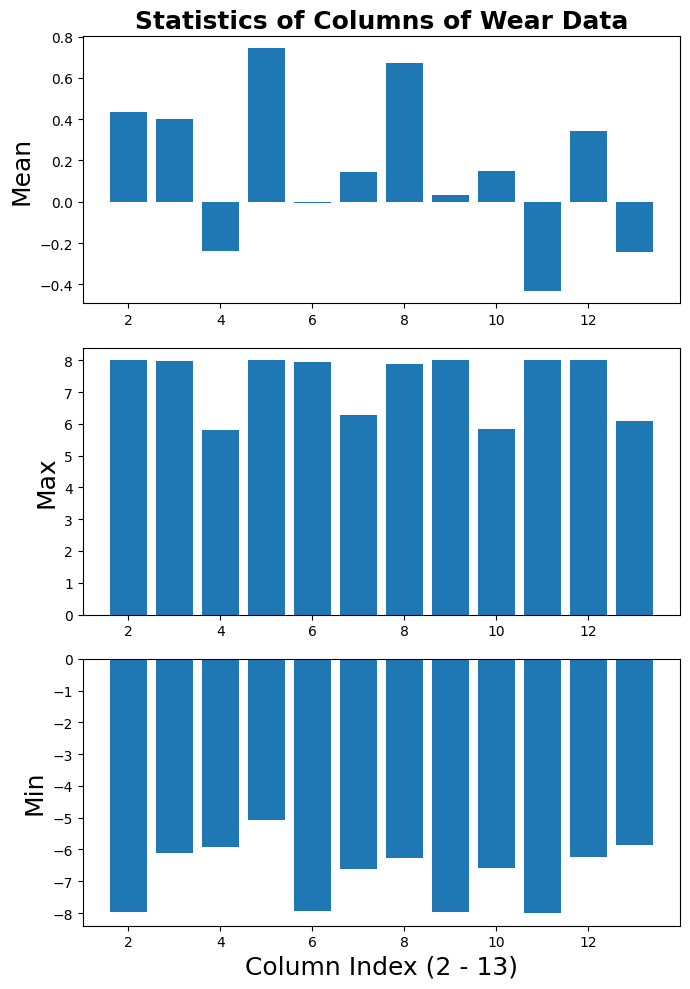

In [5]:
import matplotlib.pyplot as plt

# Select the columns you want to compare (e.g., columns 1 to 13)
selected_columns = all_sub_data_p.iloc[:, 1:13]

# Calculate the mean, max, and min values for each column
mean_values = selected_columns.mean()
max_values = selected_columns.max()
min_values = selected_columns.min()

# Create subplots for the three sets of statistics
fig, axes = plt.subplots(3, 1, figsize=(7, 10))

# Plot the means
axes[0].bar(mean_values.index, mean_values)
axes[0].set_title("Statistics of Columns of Wear Data", fontsize=18, fontweight='bold')
axes[0].set_ylabel("Mean", fontsize=18)

# Plot the max values
axes[1].bar(max_values.index, max_values)
axes[1].set_ylabel("Max", fontsize=18)

# Plot the min values
axes[2].bar(min_values.index, min_values)
axes[2].set_xlabel("Column Index (2 - 13)", fontsize=18)
axes[2].set_ylabel("Min", fontsize=18)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

[ 0.  1.  6.  2.  7.  3. 11. 12.  4.  8. 13.  9. 14. 16. 15. 10.  5. 18.
 17.]


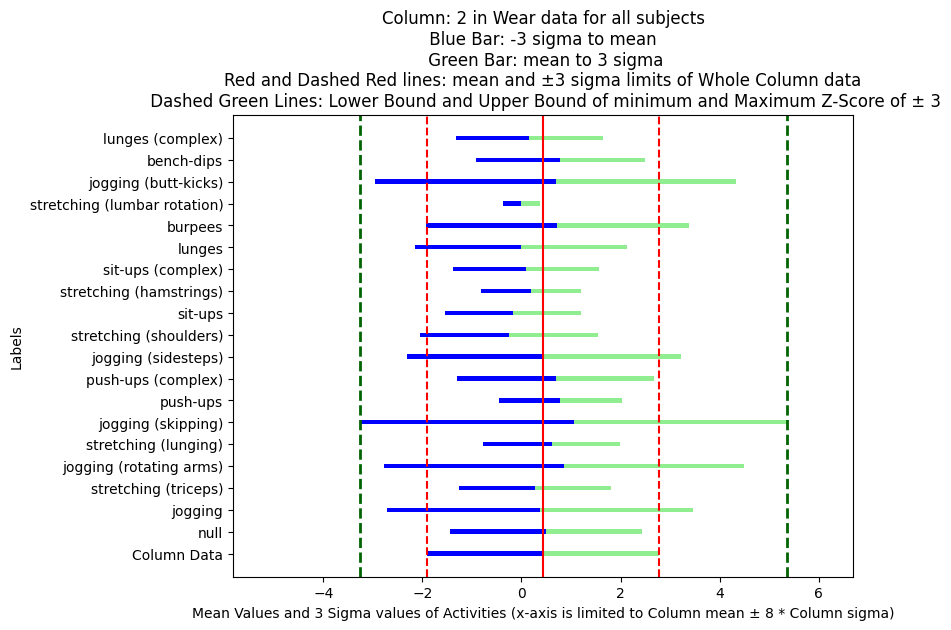

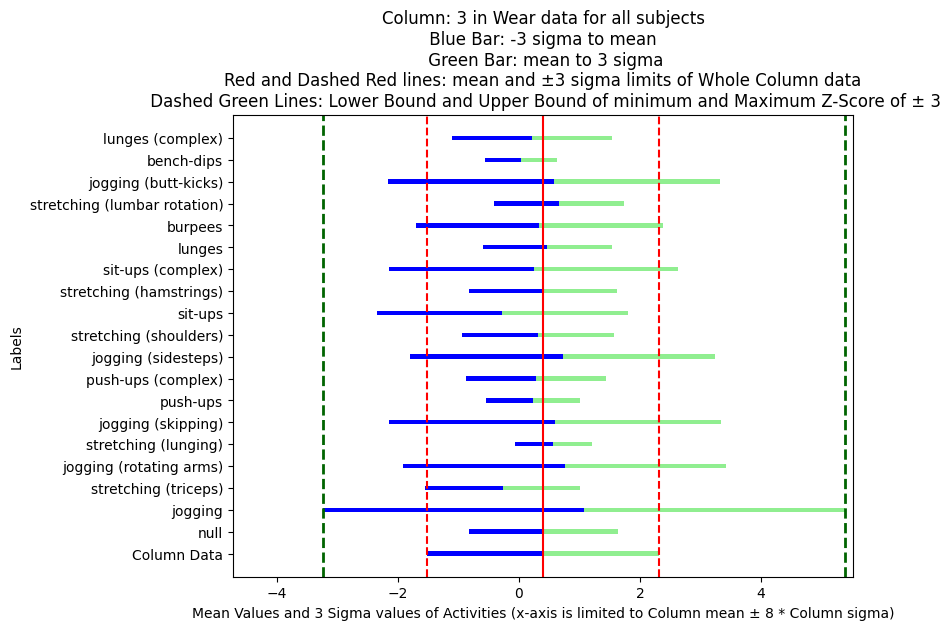

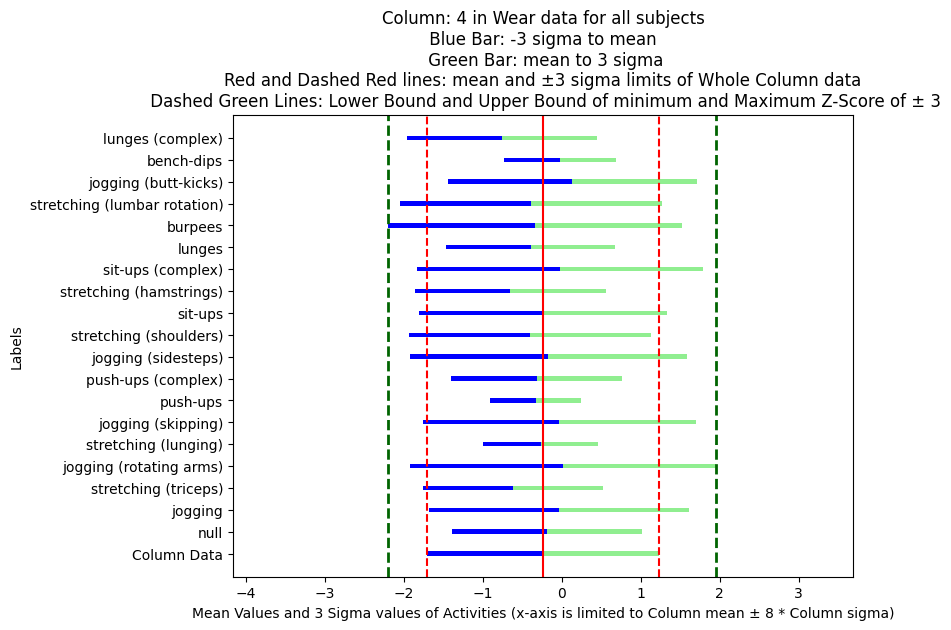

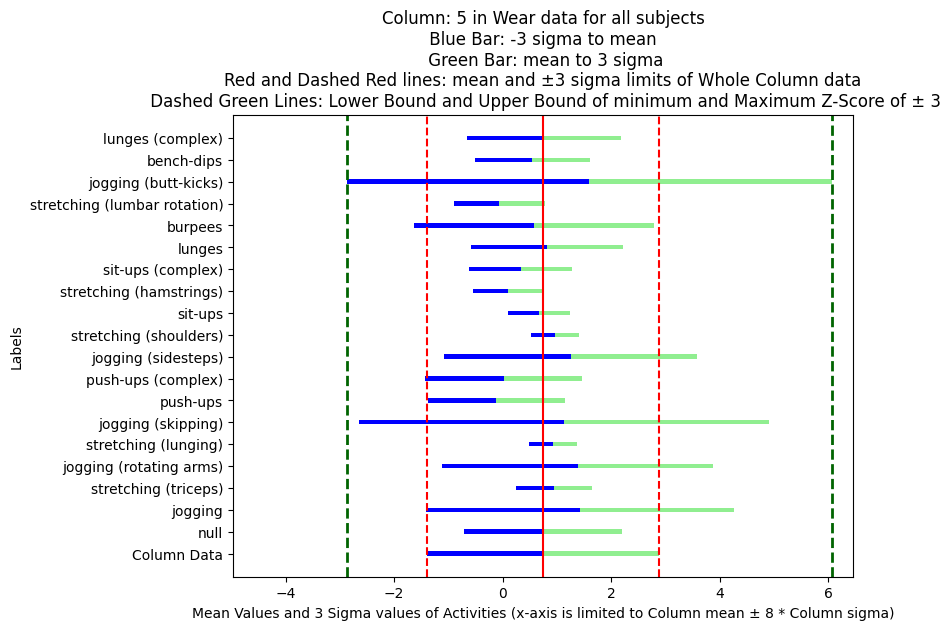

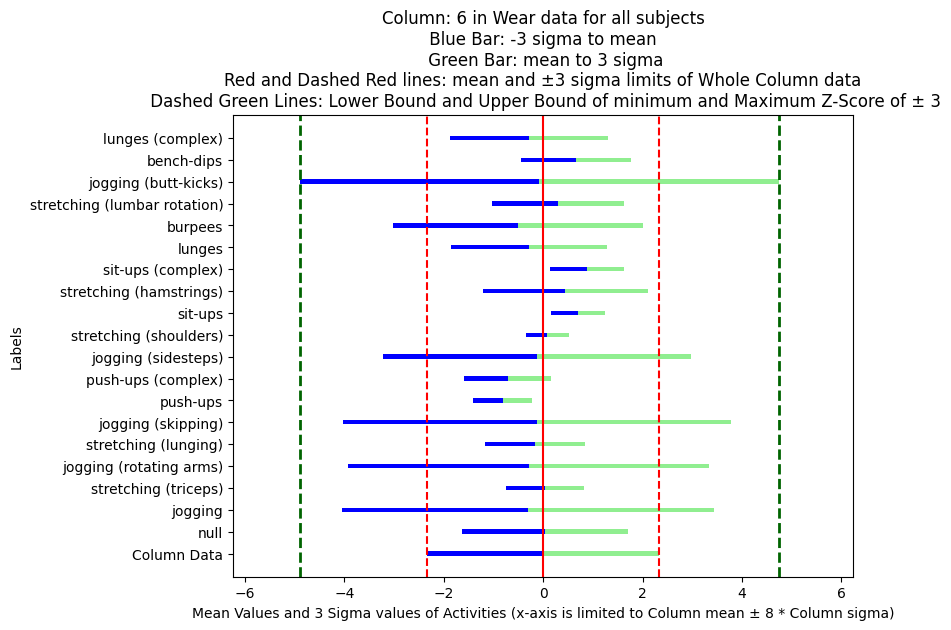

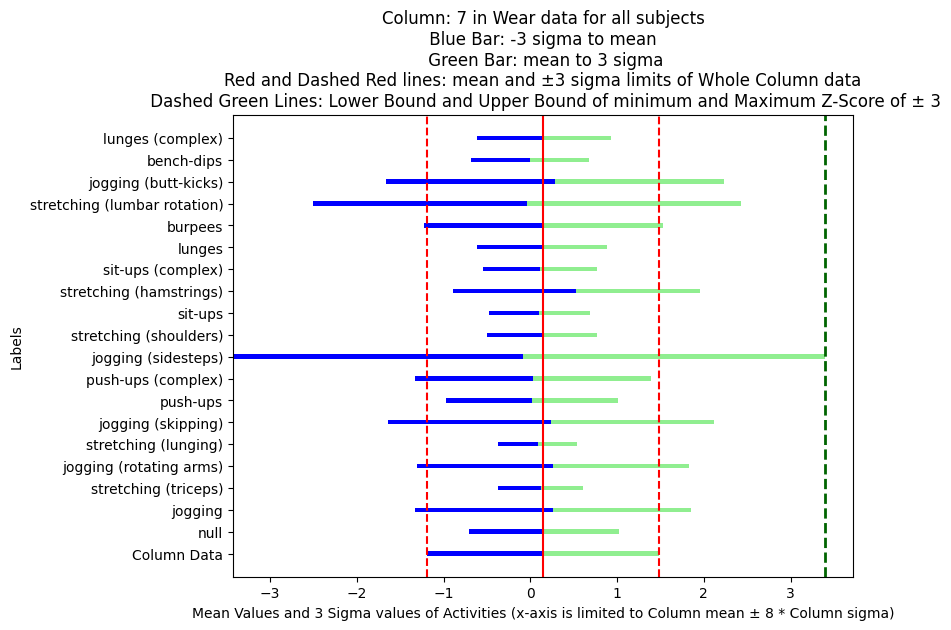

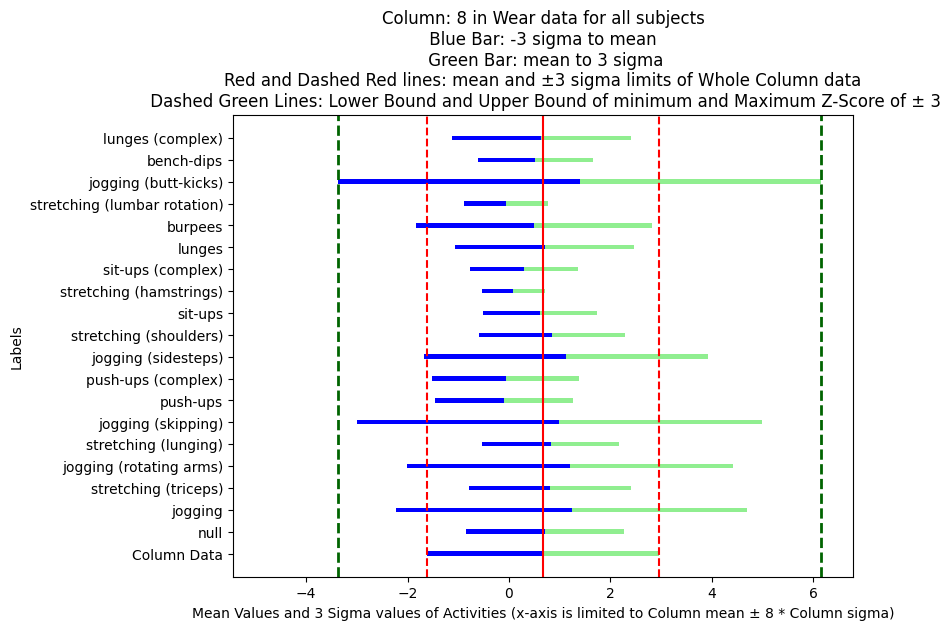

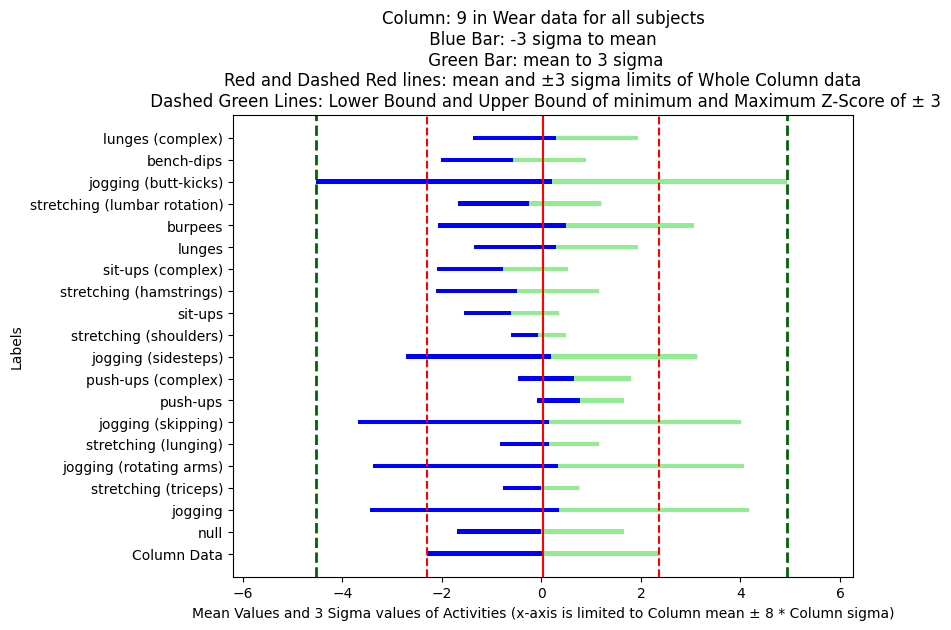

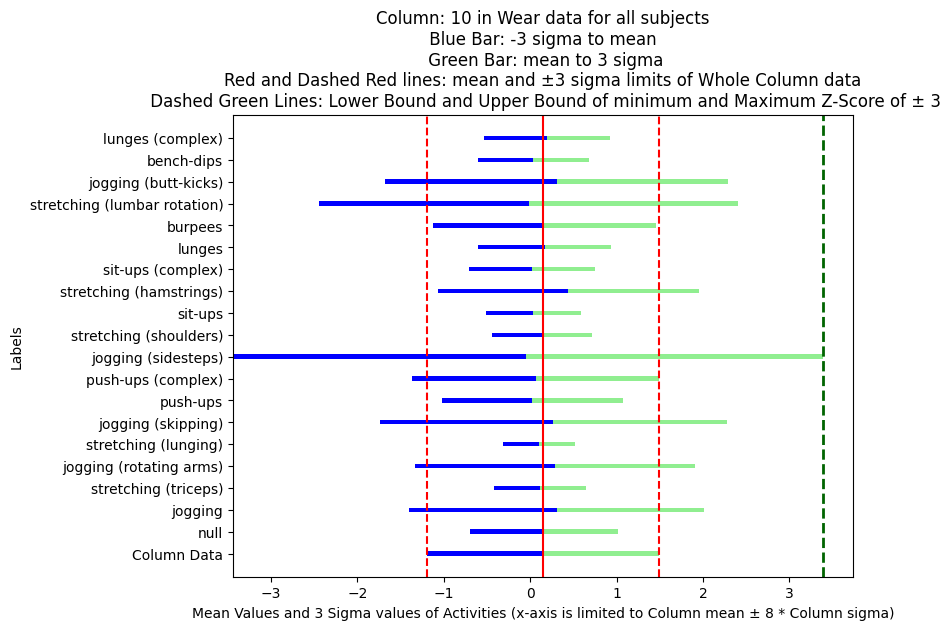

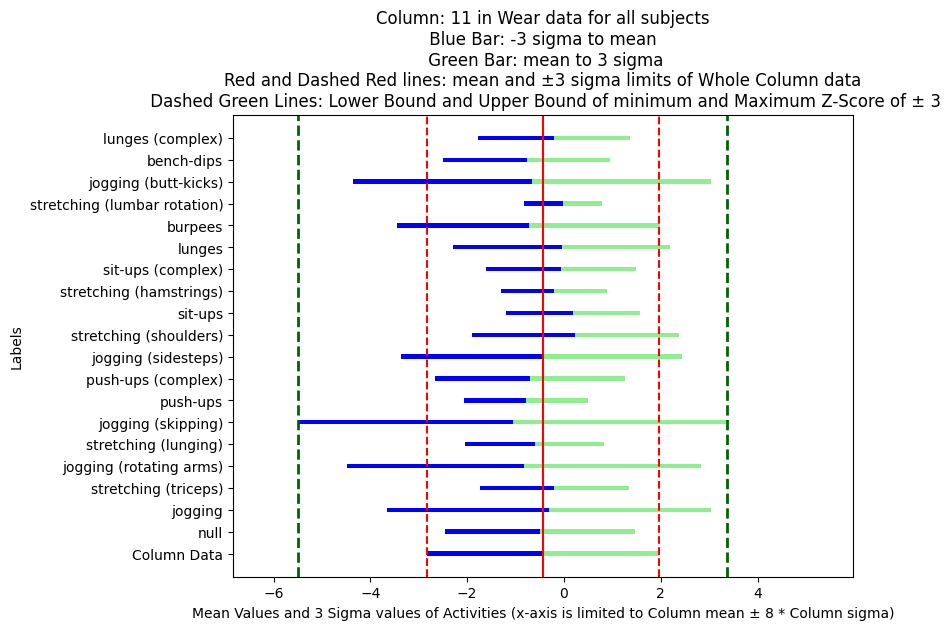

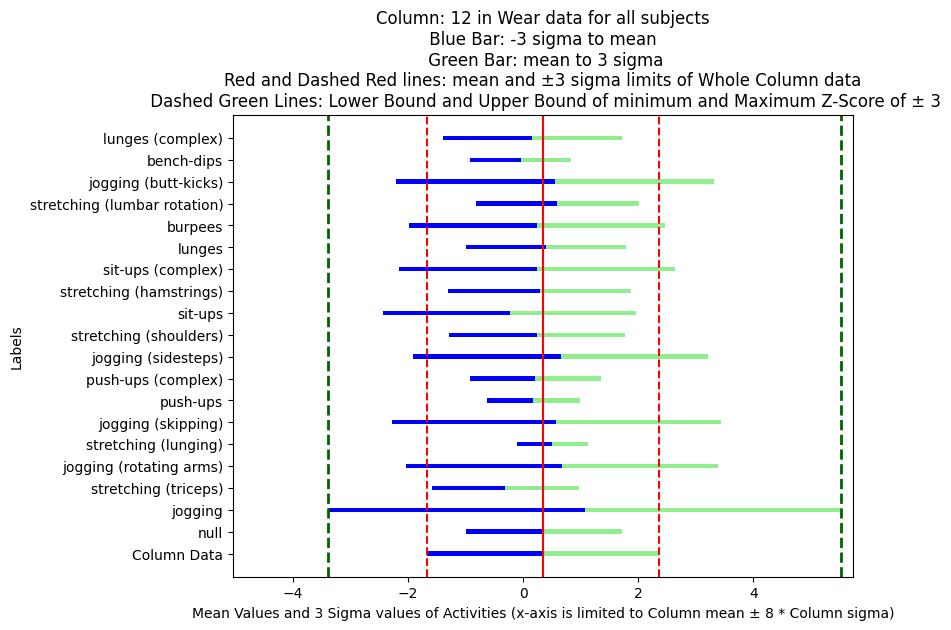

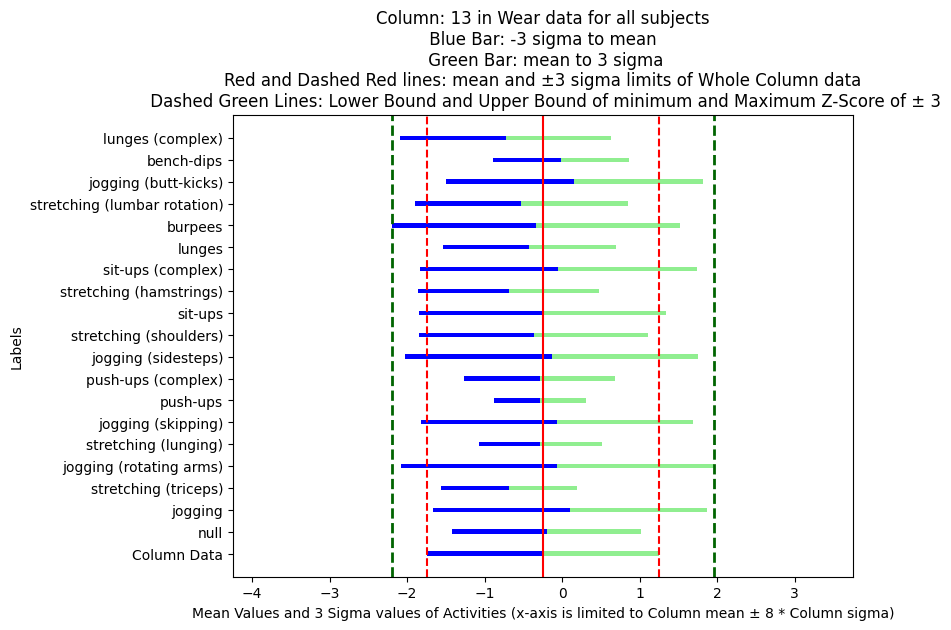

Overall Min Z-Scores: [-3.258826287895669, -3.2356489005010616, -2.1976740955272867, -2.863872765407179, -4.897454298002384, -3.5583830460577, -3.362738261784988, -4.530504336834627, -3.4892052086675243, -5.490905061650897, -3.3902987471966144, -2.1955454964761176]
Overall Max Z-Scores: [5.363604429620825, 5.382086844237591, 1.9544239776773813, 6.059481928470011, 4.735990062770536, 3.3938111121544106, 6.154199131342683, 4.944711116811356, 3.389617875960745, 3.37855596044825, 5.523915564027647, 1.9602426631018592]


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a list of unique labels in the DataFrame
unique_labels = all_sub_data_p[14].unique()
print(unique_labels)

# for col in range(2,14):
#     # Calculate the mean and sigma for the entire dataset
#     mean = all_sub_data_p[col].mean()
#     sigma = all_sub_data_p[col].std()

#     # Create a plot
#     plt.figure(figsize=(8, 6))

#     # Set the width of the rectangles
#     rect_width = 3 * sigma

#     # Define colors for the regions
#     color_below_mean = 'blue'  # Color for -3σ to mean
#     color_above_mean = 'lightgreen'  # Color for mean to 3σ

#     # Rectangle for the entire dataset
#     plt.barh(0, 3 * sigma, left=mean - 3 * sigma, color=color_below_mean, label='Column Data (Below Mean)', height=0.2)
#     plt.barh(0, 3 * sigma, left=mean, color=color_above_mean, label='Column Data (Above Mean)', height=0.2)
    
#     # Add vertical lines
#     plt.axvline(mean, color='r', linestyle='-', label='Mean (All Data)')
#     plt.axvline(mean - 3 * sigma, color='r', linestyle='--', label='Mean - 3σ (All Data)')
#     plt.axvline(mean + 3 * sigma, color='r', linestyle='--', label='Mean + 3σ (All Data)')
#     # Plot rectangles for each label
#     for i, label in enumerate(unique_labels):
#         label_data = all_sub_data_p[all_sub_data_p[14] == label]
#         label_mean = label_data[col].mean()
#         label_sigma = label_data[col].std()

#         # Rectangle for the region below the mean
#         plt.barh(i+1, 3 * label_sigma, left=label_mean - 3 * label_sigma, color=color_below_mean, label=f'{label} Data (Below Mean)', height=0.2)

#         # Rectangle for the region above the mean
#         plt.barh(i+1, 3 * label_sigma, left=label_mean, color=color_above_mean, label=f'{label} Data (Above Mean)', height=0.2)
 
#     label_name_list = [list(label_dict_new.keys())[list(label_dict_new.values()).index(label_num)] for label_num in unique_labels]

#     # Set y-axis labels and limit
#     plt.yticks(np.arange(len(unique_labels) + 1), ['Column Data']+label_name_list)
#     plt.xlim(mean - 5 * sigma, mean + 5 * sigma)

#     # Set labels
#     plt.xlabel('Mean Values and 3 Sigma values')
#     plt.ylabel('Labels')
#     plt.title(f'Column: {col} in Opportunity ADL data for all subjects\n Blue: -3 sigma to mean \n Green: mean to 3 sigma\nVertical Red lines: mean and 3 sigma limits of Column data')
#     # Show the plot
#     plt.show()

    # Lists to store min and max z-scores for all activities
min_z_scores = []
max_z_scores = []

for col in range(2, 14):
    # Calculate the mean and sigma for the entire column
    mean = all_sub_data_p[col].mean()
    sigma = all_sub_data_p[col].std()

    # Create a plot
    plt.figure(figsize=(8, 6))

    # Set the width of the rectangles
    rect_width = 3 * sigma

    # Define colors for the regions
    color_below_mean = 'blue'  # Color for -3σ to mean
    color_above_mean = 'lightgreen'  # Color for mean to 3σ
    color_min_max = 'darkgreen'  # Color for minimum and maximum z-scores

    # Rectangle for the entire dataset
    plt.barh(0, 3 * sigma, left=mean - 3 * sigma, color=color_below_mean, label='Column Data (Below Mean)', height=0.2)
    plt.barh(0, 3 * sigma, left=mean, color=color_above_mean, label='Column Data (Above Mean)', height=0.2)

    # Add vertical lines
    plt.axvline(mean, color='r', linestyle='-', label='Mean (All Data)')
    plt.axvline(mean - 3 * sigma, color='r', linestyle='--', label='Mean - 3σ (All Data)')
    plt.axvline(mean + 3 * sigma, color='r', linestyle='--', label='Mean + 3σ (All Data)')

    # Lists to store min and max z-scores for each activity
    activity_min_z_scores = []
    activity_max_z_scores = []

    # Plot rectangles for each label
    for i, label in enumerate(unique_labels):
        label_data = all_sub_data_p[all_sub_data_p[14] == label]
        label_mean = label_data[col].mean()
        label_sigma = label_data[col].std()

        # Rectangle for the region below the mean
        plt.barh(i + 1, 3 * label_sigma, left=label_mean - 3 * label_sigma, color=color_below_mean,
                 label=f'{label} Data (Below Mean)', height=0.2)

        # Rectangle for the region above the mean
        plt.barh(i + 1, 3 * label_sigma, left=label_mean, color=color_above_mean, label=f'{label} Data (Above Mean)',
                 height=0.2)

        # Update min and max z-scores for the activity
        min_z_score = label_mean - 3 * label_sigma
        max_z_score = label_mean + 3 * label_sigma
        activity_min_z_scores.append(min_z_score)
        activity_max_z_scores.append(max_z_score)

    # Calculate overall min and max z-scores for the column
    min_z_scores.append(min(activity_min_z_scores))
    max_z_scores.append(max(activity_max_z_scores))

    # Draw dark green lines for the overall min and max z-scores
    plt.axvline(min(activity_min_z_scores), color=color_min_max, linestyle='--', label='Overall Min Z-Score', linewidth=2)
    plt.axvline(max(activity_max_z_scores), color=color_min_max, linestyle='--', label='Overall Max Z-Score', linewidth=2)

    label_name_list = [list(label_dict_new.keys())[list(label_dict_new.values()).index(label_num)] for label_num in unique_labels]

    # Set y-axis labels and limit
    plt.yticks(np.arange(len(unique_labels) + 1), ['Column Data'] + label_name_list)
    limit = 8
    plt.xlim(mean - limit * sigma, mean + limit* sigma)

    # Set labels
    plt.xlabel(f'Mean Values and 3 Sigma values of Activities (x-axis is limited to Column mean \u00B1 {limit} * Column sigma)')
    plt.ylabel('Labels')
    plt.title(f'Column: {col} in Wear data for all subjects\n Blue Bar: -3 sigma to mean \n Green Bar: mean to 3 sigma\nRed and Dashed Red lines: mean and \u00B13 sigma limits of Whole Column data\n Dashed Green Lines: Lower Bound and Upper Bound of minimum and Maximum Z-Score of \u00B1 3')

    # Show the plot
    plt.show()

# Now you can use the min_z_scores and max_z_scores lists as needed
print("Overall Min Z-Scores:", min_z_scores)
print("Overall Max Z-Scores:", max_z_scores)


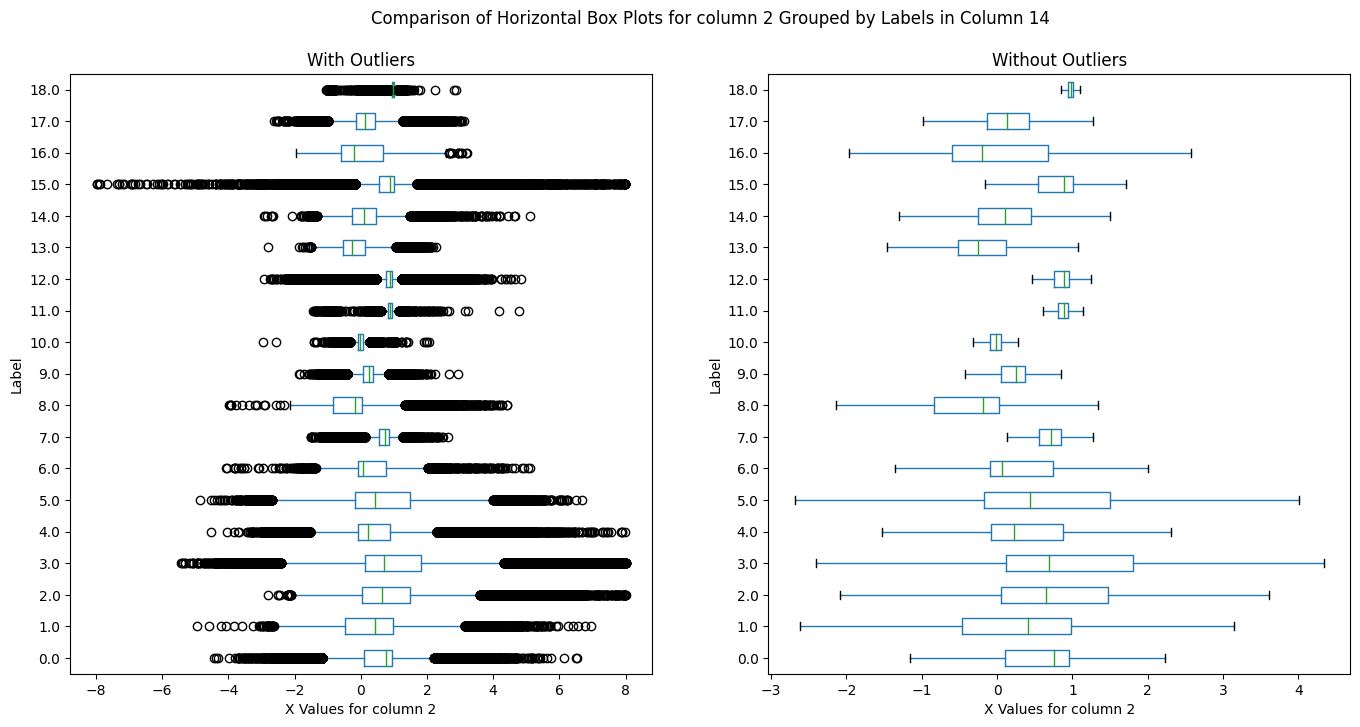

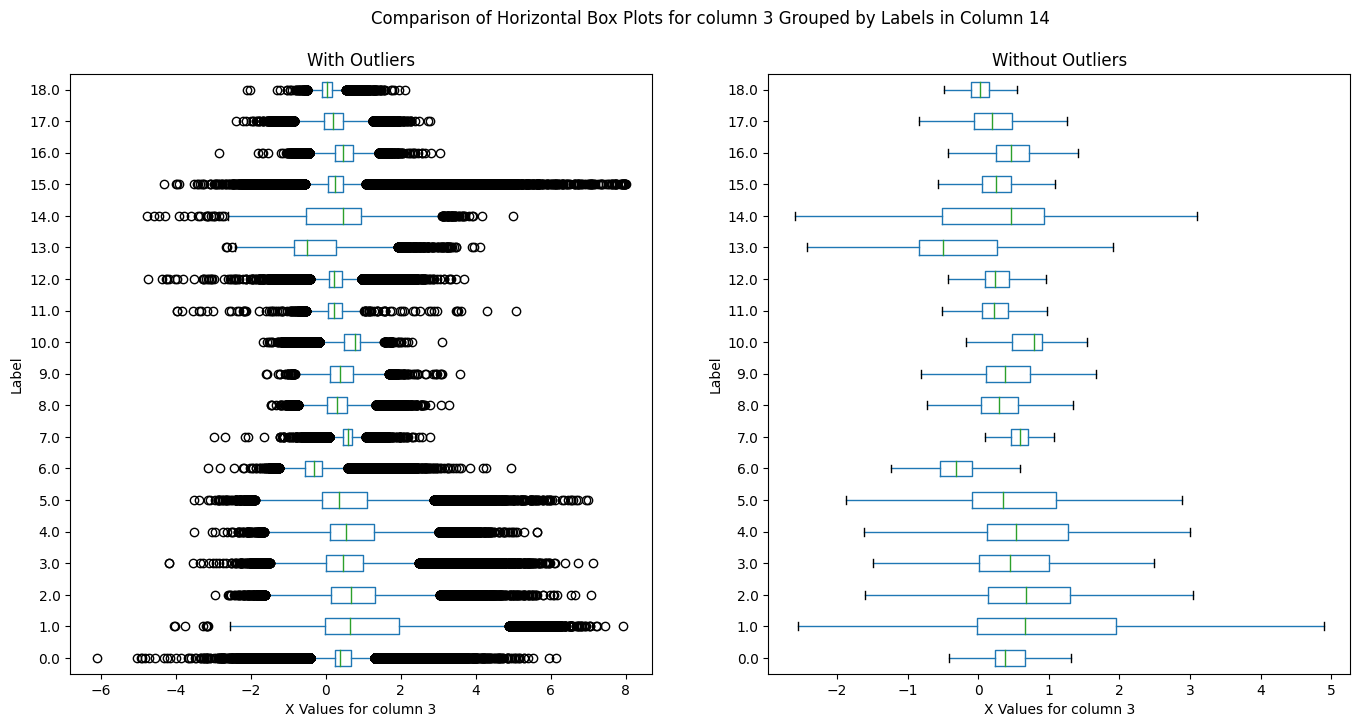

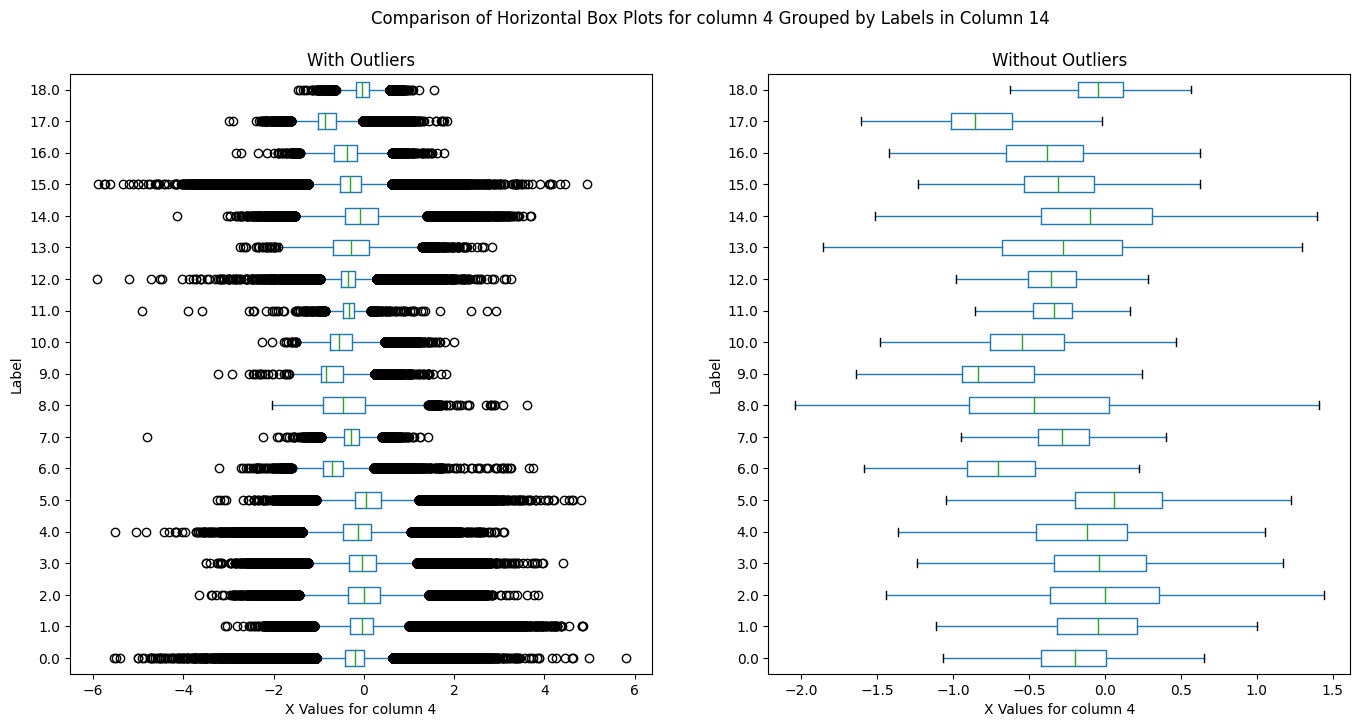

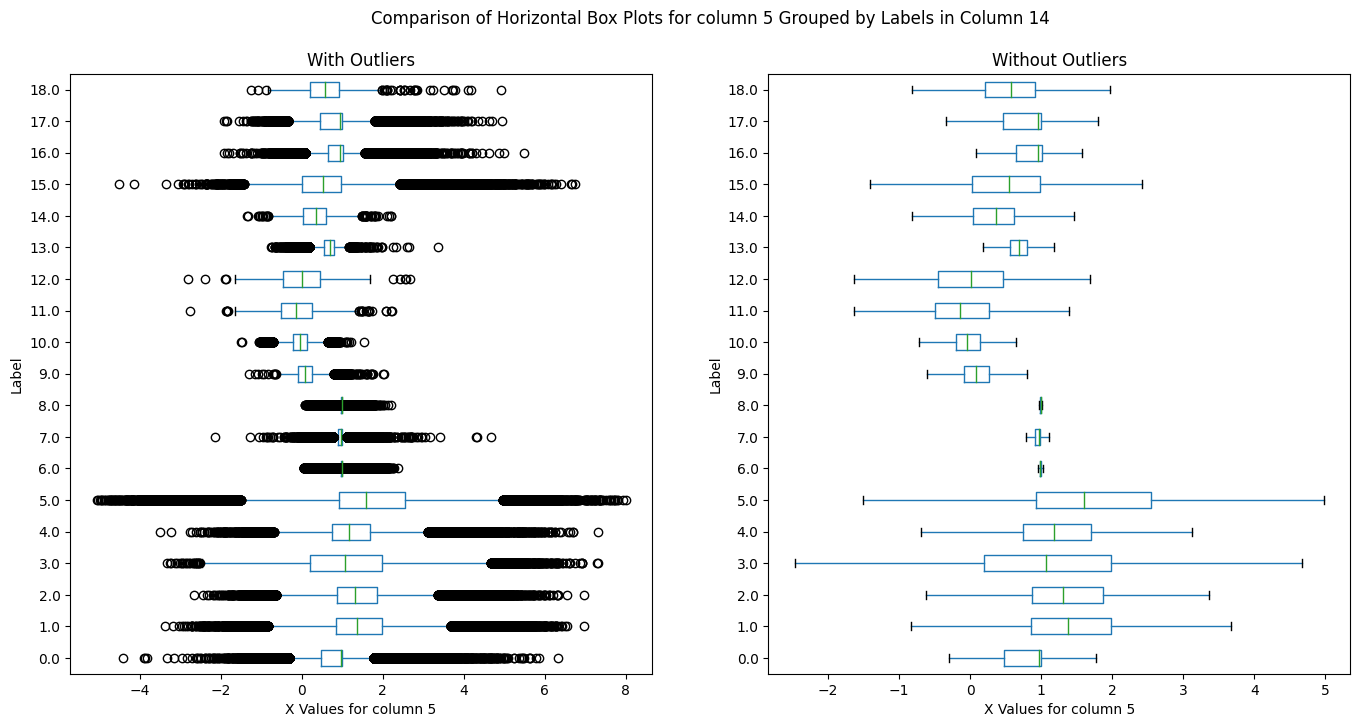

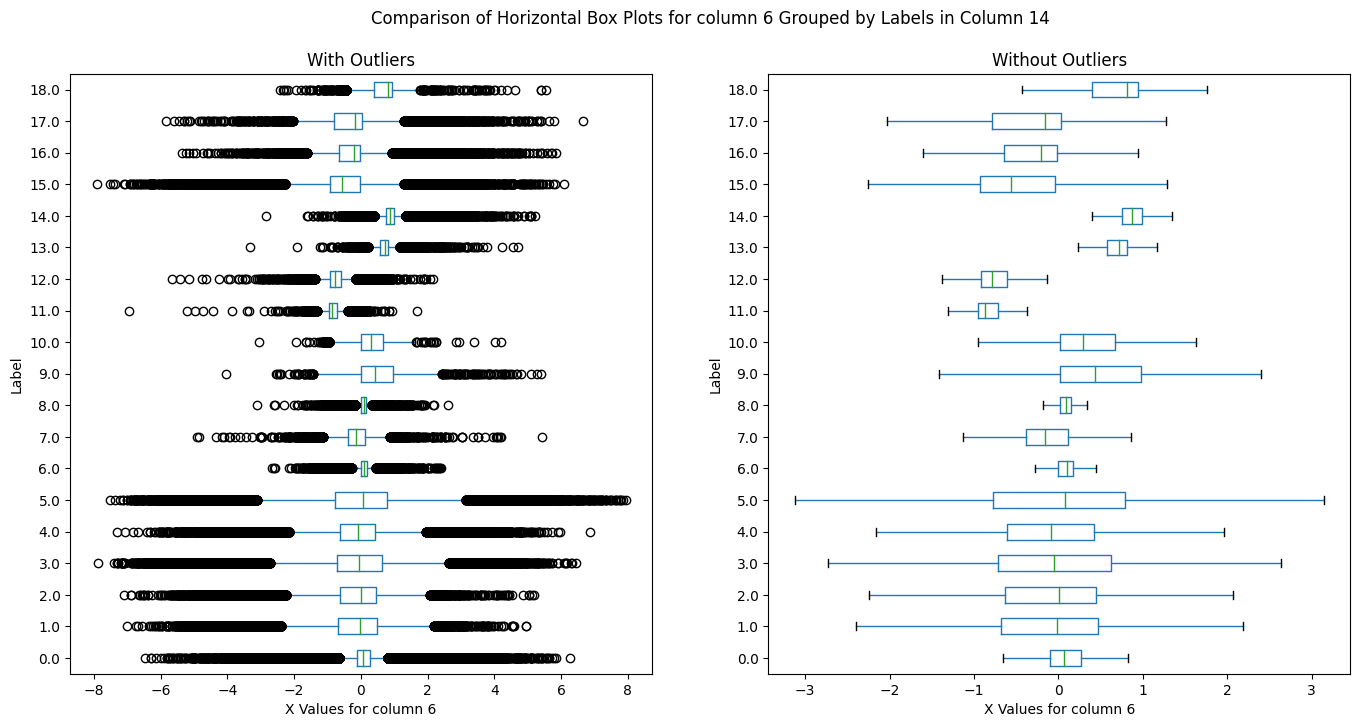

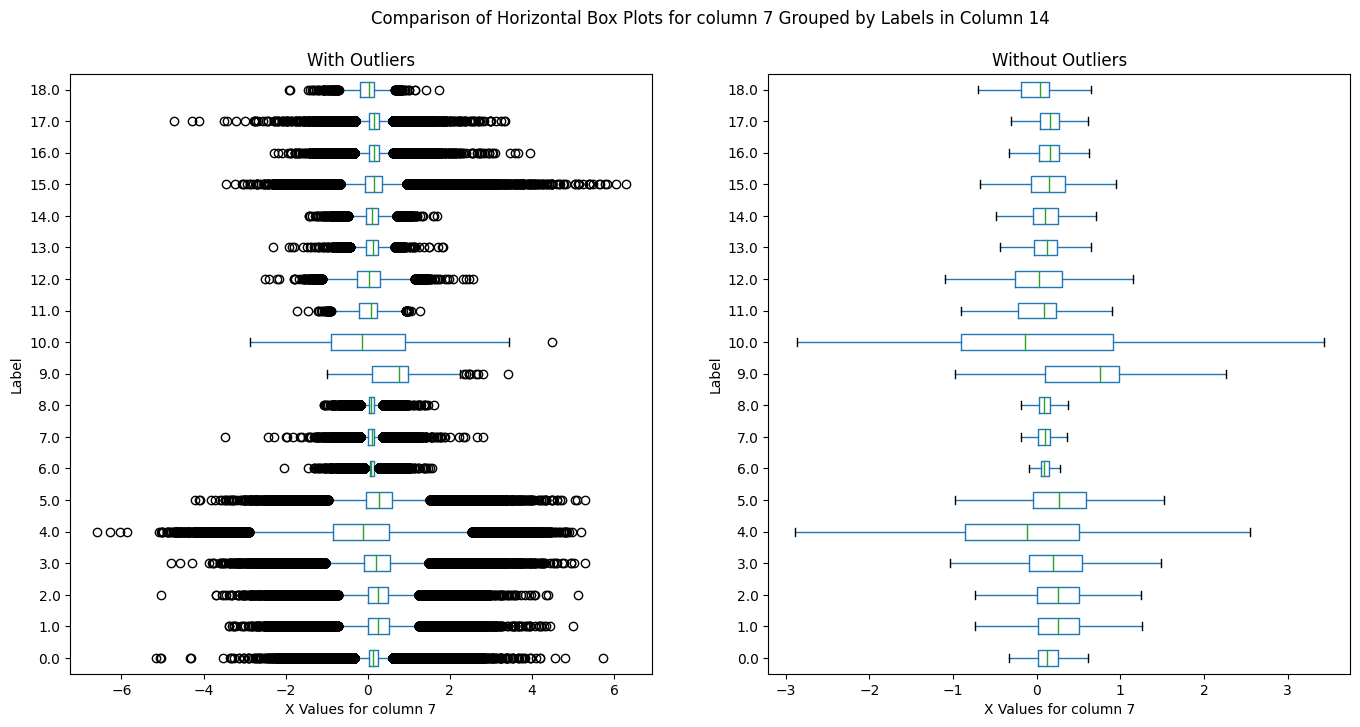

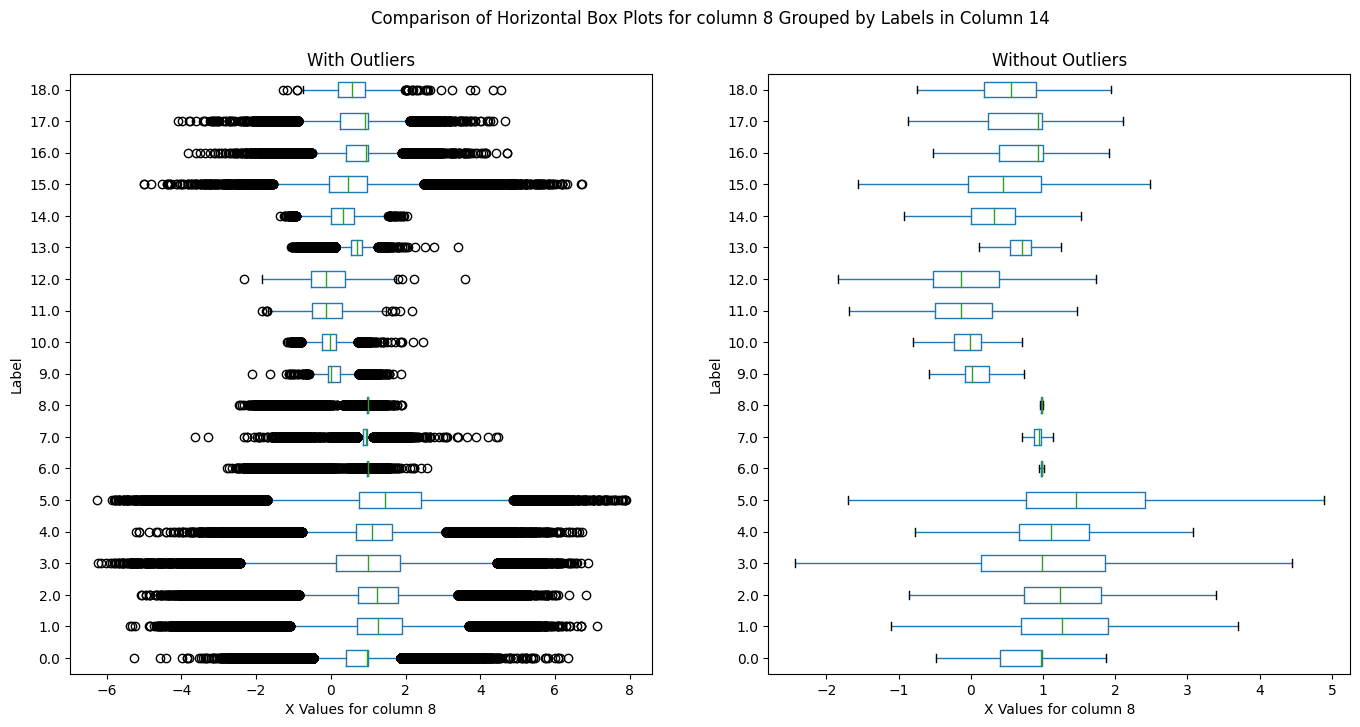

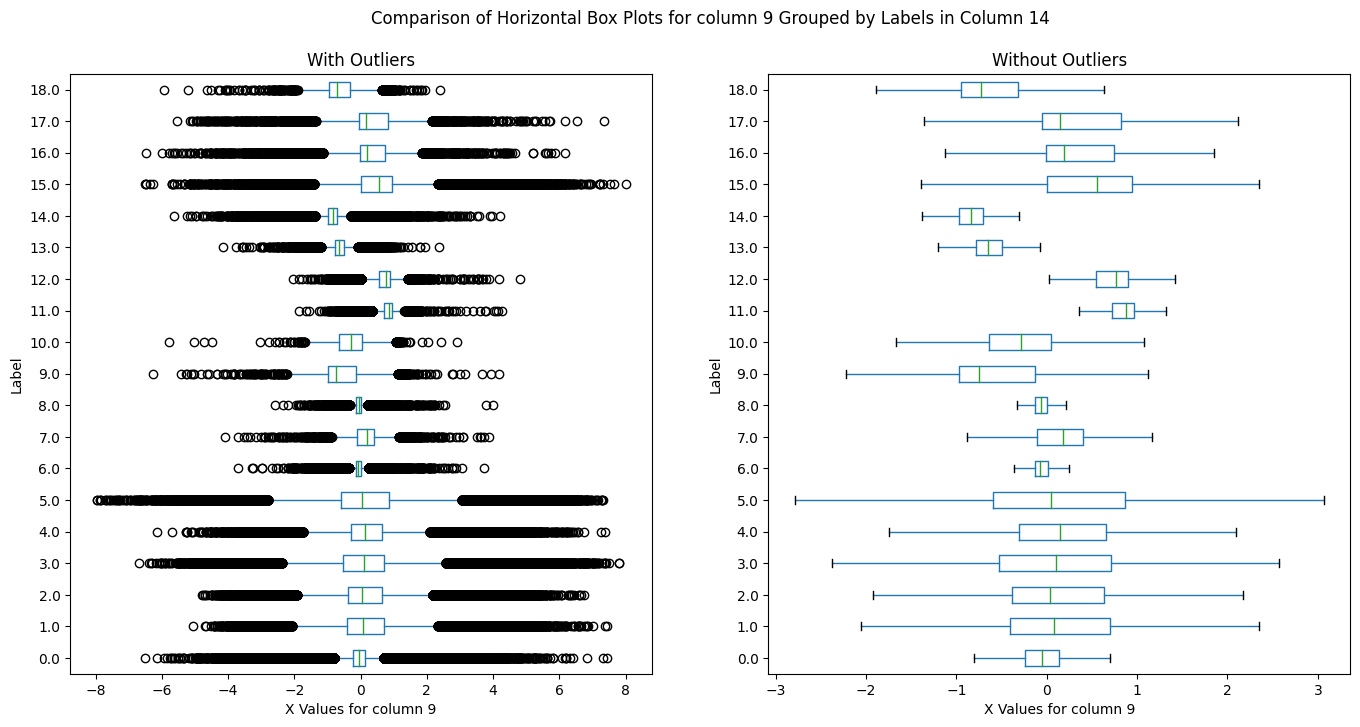

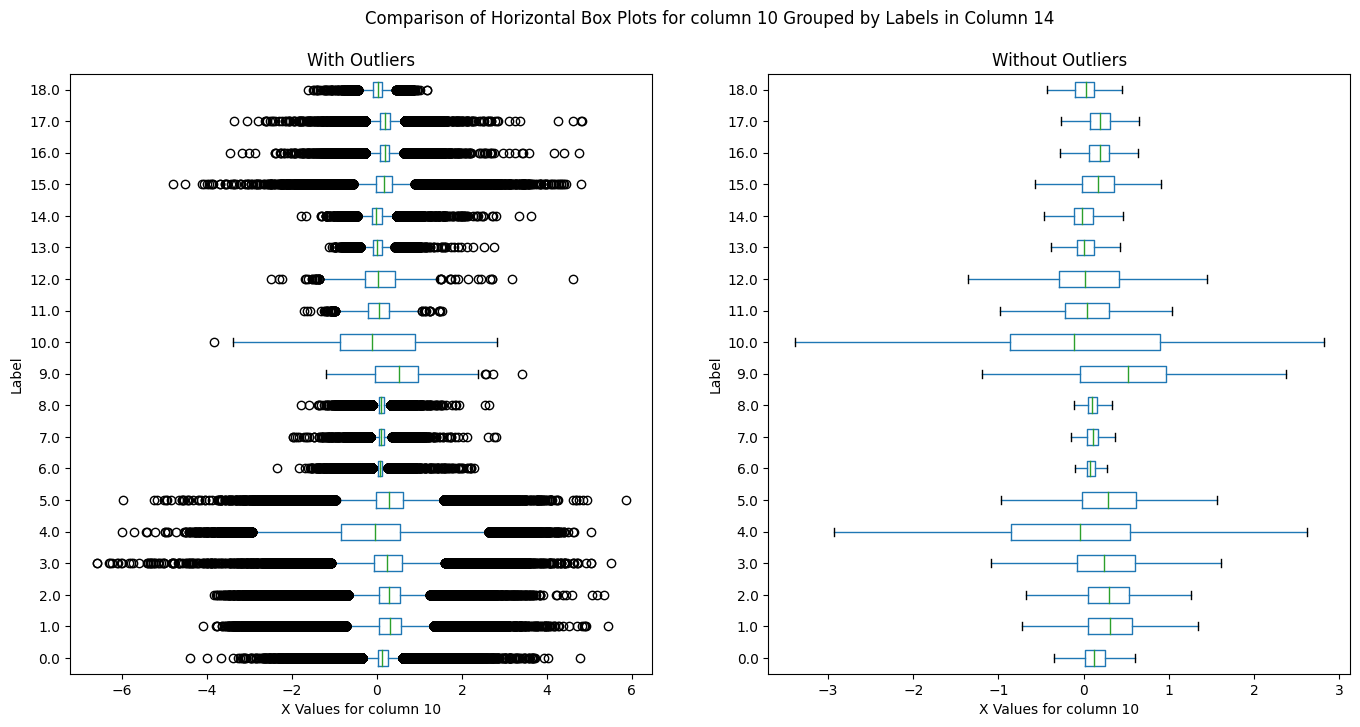

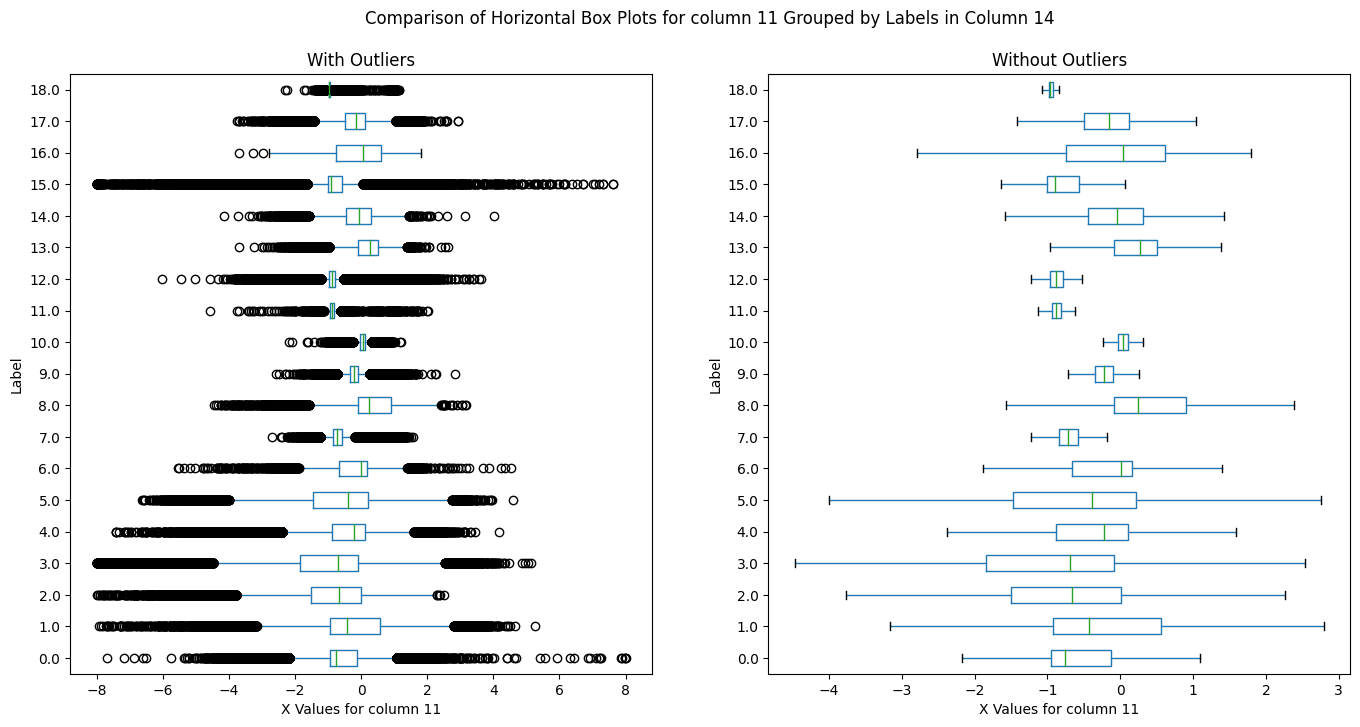

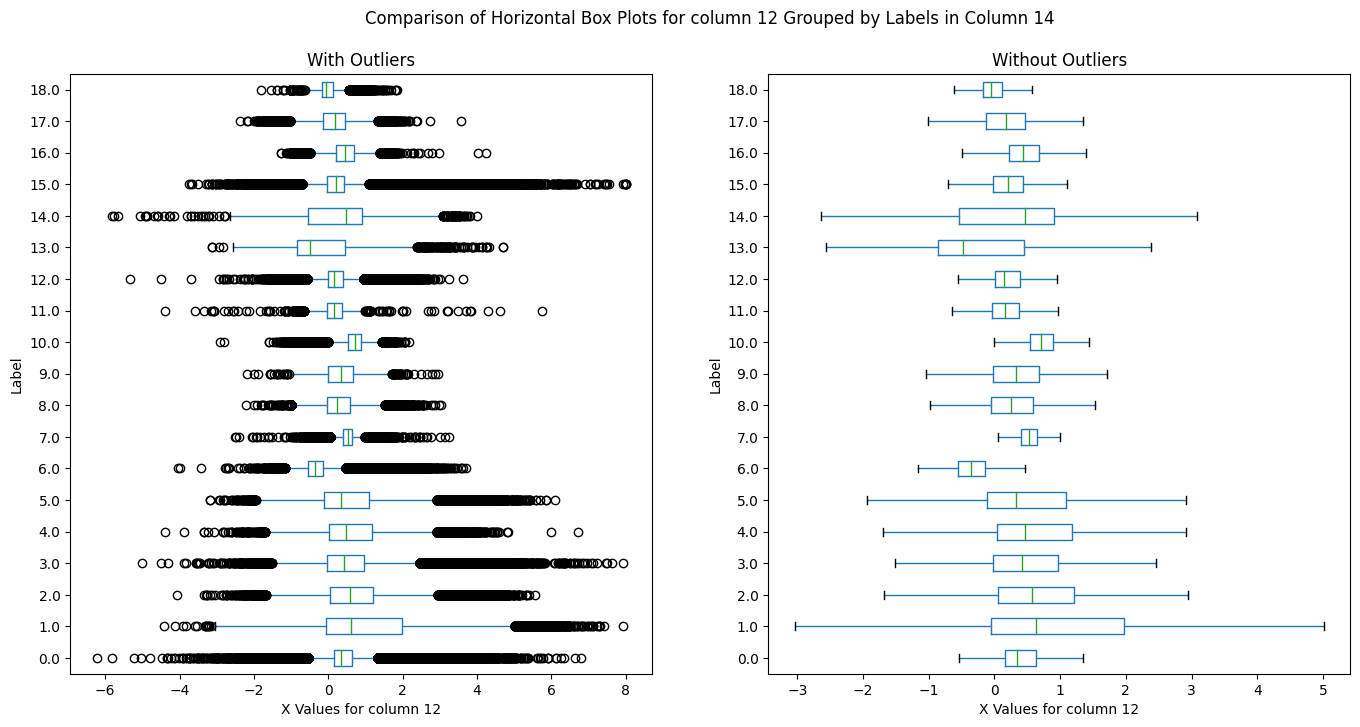

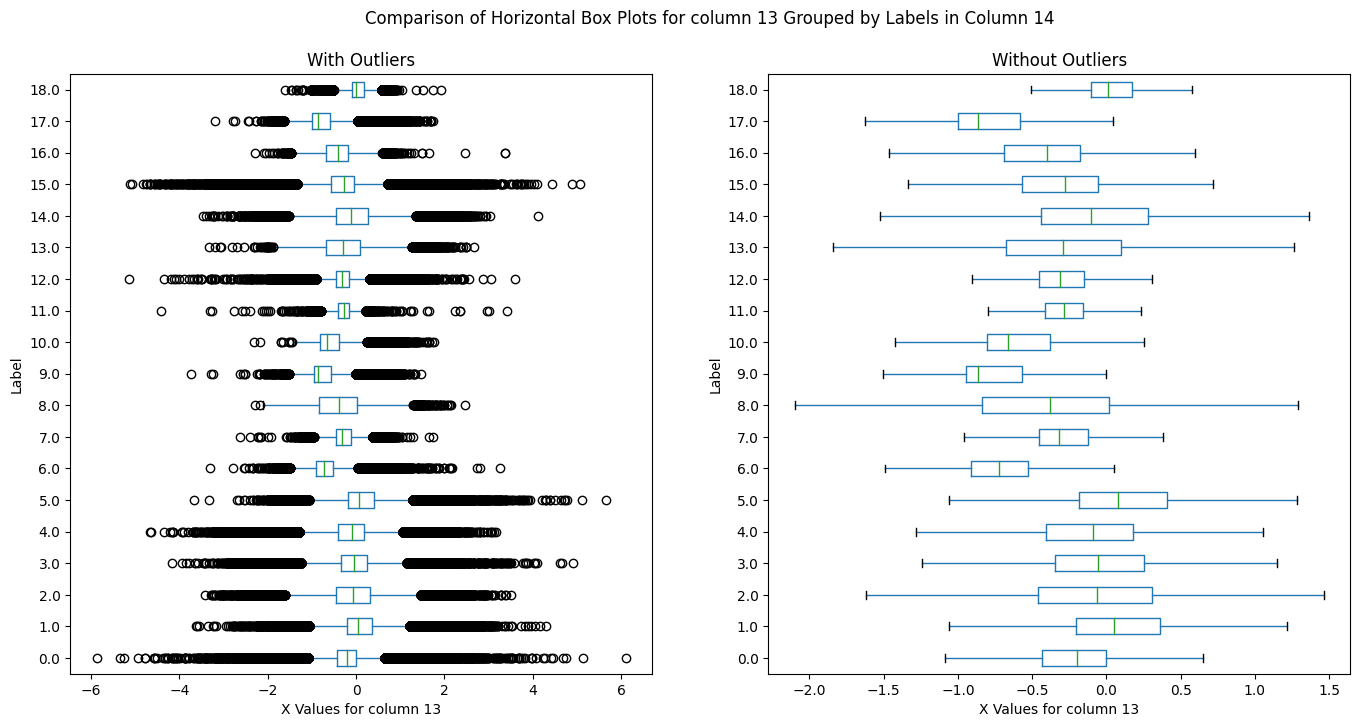

box_plot_lower_bound_list: [-2.6841823809523815, -2.9673480952380955, -2.285452380952381, -2.485802619047619, -3.1233133333333334, -3.630593785714286, -2.4378485714285714, -2.787144761904763, -3.518360238095238, -4.470770535714286, -3.0854929761904764, -2.11944]
box_plot_upper_bound_list: [4.335653333333333, 4.894164285714286, 1.439923095238095, 4.97738119047619, 3.1423666666666668, 3.6396085, 4.888961428571428, 3.0645657142857154, 3.5525207142857145, 2.7942375000000004, 5.0134375, 1.4638642857142856]


In [7]:
# for i in range(2,14):
 
#         # Create a figure with two subplots
#     fig, axes = plt.subplots(1, 2, figsize=(16, 8))

#     # Create horizontal box plots for columns 2 to 114, grouped by the labels in column 116, with and without outliers
#     all_sub_data_p.boxplot(column=[i], by=[14], grid=False, vert=False, showfliers=True, ax=axes[0])
#     all_sub_data_p.boxplot(column=[i], by=[14], grid=False, vert=False, showfliers=False, ax=axes[1])

#     # Set titles for the subplots
#     axes[0].set_title('With Outliers')
#     axes[1].set_title('Without Outliers')

#     # Set plot labels and common title
#     for ax in axes:
#         ax.set_xlabel('X Values')
#         ax.set_ylabel('Label')

#     plt.suptitle(f'Comparison of Horizontal Box Plots for column {i} Grouped by Labels in Column 14')

#     # Show the plot
#     plt.show()

import pandas as pd
import matplotlib.pyplot as plt


box_plot_lower_bound_list = []
box_plot_upper_bound_list = []

for i in range(2, 14):
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))

    # Create horizontal box plots for columns 2 to 114, grouped by the labels in column 14, with and without outliers
    all_sub_data_p.boxplot(column=[i], by=[14], grid=False, vert=False, showfliers=True, ax=axes[0])
    all_sub_data_p.boxplot(column=[i], by=[14], grid=False, vert=False, showfliers=False, ax=axes[1])

    box_plot_lower_bound_list_column = []
    box_plot_upper_bound_list_column = []

    for label, divided_dataset in all_sub_data_p.groupby(14)[i]:
        # Calculate quartiles and IQR
        Q1 = divided_dataset.quantile(0.25)
        Q3 = divided_dataset.quantile(0.75)
        IQR = Q3 - Q1

        # Determine maximum and minimum values for outliers
        maximum_value = Q3 + 1.5 * IQR
        minimum_value = Q1 - 1.5 * IQR

        box_plot_lower_bound_list_column.append(minimum_value)
        box_plot_upper_bound_list_column.append(maximum_value)

    box_plot_lower_bound_list.append(min(box_plot_lower_bound_list_column))
    box_plot_upper_bound_list.append(max(box_plot_upper_bound_list_column))

    # Set titles for the subplots
    axes[0].set_title('With Outliers')
    axes[1].set_title('Without Outliers')

    # Set plot labels and common title
    for ax in axes:
        ax.set_xlabel(f'X Values for column {i}')
        ax.set_ylabel('Label')

    plt.suptitle(f'Comparison of Horizontal Box Plots for column {i} Grouped by Labels in Column 14')

    # Show the plot
    plt.show()

print(f'box_plot_lower_bound_list: {box_plot_lower_bound_list}')
print(f'box_plot_upper_bound_list: {box_plot_upper_bound_list}')


In [8]:
# Initialize counters
min_lower_count = 0
max_higher_count = 0

# Initialize masks
min_mask = []
max_mask = []

# Initialize the dictionary
result_dict = {}

# Compare values index-wise
for i in range(len(min_z_scores)):
    if min_z_scores[i] <= box_plot_lower_bound_list[i]:
        min_lower_count += 1
        min_mask.append('Z')
    else:
        min_mask.append('B')

    if max_z_scores[i] >= box_plot_upper_bound_list[i]:
        max_higher_count += 1
        max_mask.append('Z')
    else:
        max_mask.append('B')

    # Add values to the dictionary with rounded decimal values
    result_dict[i + 2] = [
        round(min_z_scores[i], 2),
        round(box_plot_lower_bound_list[i], 2),
        min_mask[i],
        round(max_z_scores[i], 2),
        round(box_plot_upper_bound_list[i], 2),
        max_mask[i]
    ]

# Print the results
print(f'Number of times overall min Z-Score is lower than Box plot minimums: {min_lower_count} of {len(min_z_scores)} in percentage {round(min_lower_count / len(min_z_scores) * 100, 2)}')
print(f'Number of times overall max Z-Score is higher than Box plot maximums: {max_higher_count} of {len(min_z_scores)} in percentage {round(max_higher_count / len(min_z_scores) * 100, 2)}')

# Print the dictionary
print("Result Dictionary:")
for key, value in result_dict.items():
    print(f'{key}: {value}')



Number of times overall min Z-Score is lower than Box plot minimums: 9 of 12 in percentage 75.0
Number of times overall max Z-Score is higher than Box plot maximums: 10 of 12 in percentage 83.33
Result Dictionary:
2: [-3.26, -2.68, 'Z', 5.36, 4.34, 'Z']
3: [-3.24, -2.97, 'Z', 5.38, 4.89, 'Z']
4: [-2.2, -2.29, 'B', 1.95, 1.44, 'Z']
5: [-2.86, -2.49, 'Z', 6.06, 4.98, 'Z']
6: [-4.9, -3.12, 'Z', 4.74, 3.14, 'Z']
7: [-3.56, -3.63, 'B', 3.39, 3.64, 'B']
8: [-3.36, -2.44, 'Z', 6.15, 4.89, 'Z']
9: [-4.53, -2.79, 'Z', 4.94, 3.06, 'Z']
10: [-3.49, -3.52, 'B', 3.39, 3.55, 'B']
11: [-5.49, -4.47, 'Z', 3.38, 2.79, 'Z']
12: [-3.39, -3.09, 'Z', 5.52, 5.01, 'Z']
13: [-2.2, -2.12, 'Z', 1.96, 1.46, 'Z']


In [9]:
# Create an empty dictionary to store the divided datasets
divided_datasets = {}

# Iterate through the labels in gestures_dict_old and filter rows based on the label
for label_name, label_id in label_dict_new.items():

    subset_df = all_sub_data_p[all_sub_data_p.iloc[:, -1] == label_id].copy()
    # print(f"Divided dataset by {label_name} and its stats: {subset_df.describe()}")

    # # Iterate through each column and create a plot
    # Iterate through each column and create a plot
    # for column in subset_df.columns[1:13]:
    #     plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
        
    #     # Plot the histogram
    #     sns.histplot(subset_df[column], kde=True)  # Use sns.histplot for histograms, you can use other plot types as needed
        
    #     # Calculate statistics
    #     mean = subset_df[column].mean()
    #     std = subset_df[column].std()
        
    #     # Plot lines for mean and standard deviations
    #     plt.axvline(mean, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
    #     plt.axvline(mean + std, color='g', linestyle='dashed', linewidth=2, label=f'1 Std: {mean + std:.2f}')
    #     plt.axvline(mean + 2*std, color='b', linestyle='dashed', linewidth=2, label=f'2 Std: {mean + 2*std:.2f}')
    #     plt.axvline(mean + 3*std, color='m', linestyle='dashed', linewidth=2, label=f'3 Std: {mean + 3*std:.2f}')
    #     plt.axvline(mean + 4*std, color='y', linestyle='dashed', linewidth=2, label=f'4 Std: {mean + 4*std:.2f}')
        
    #     plt.axvline(mean - std, color='g', linestyle='dashed', linewidth=2)
    #     plt.axvline(mean - 2*std, color='b', linestyle='dashed', linewidth=2)
    #     plt.axvline(mean - 3*std, color='m', linestyle='dashed', linewidth=2)
    #     plt.axvline(mean - 4*std, color='y', linestyle='dashed', linewidth=2)
        
    #     plt.title(f'Distribution of {column}')
    #     plt.xlabel(column)
    #     plt.ylabel('Frequency')
        
    #     # Add a legend to show the lines
    #     plt.legend()
        
    #     plt.show()
    
    # Add the filtered DataFrame to the dictionary
    divided_datasets[label_name] = subset_df

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a function to calculate statistics
def statistics_for_preprocessing(column_name, df):
    data = df[column_name].dropna()
    # Calculate box plot statistics after excluding outliers
    box_stats = pd.Series(data).describe()
    
    # Create a table with the statistics and percentage of outliers
    table_data = {
        'mean' : box_stats['mean'],
        'median' : box_stats['50%'],
        'std' : box_stats['std'],
        'min' : box_stats['min'],
        'max' : box_stats['max'],
        'NaN points excluded length' : len(data),
    }
    return table_data

full_data_for_prepprocessing_per_column = {}
for column in all_sub_data_p.columns[1:13]:
       full_data_for_prepprocessing_per_column[column] = statistics_for_preprocessing(column,all_sub_data_p)

data_for_prepprocessing_per_label = {}
for label_name, label_dataset in divided_datasets.items():
    # print(f"label_name: {label_name}")
    df = label_dataset
    # Create index columns for the columns starting from 0
    df.columns = [i+1 for i in range(len(df.columns))]

    # Loop through each column and create a box plot with statistics and percentage of outliers
    data_for_prepprocessing_per_column = {}
    for column in df.columns[1:13]:
       data_for_prepprocessing_per_column[column] = statistics_for_preprocessing(column,df)

    data_for_prepprocessing_per_label[label_name] = data_for_prepprocessing_per_column

import json
# Specify the file path where you want to save the dictionary in JSON format
file_path = "statistics.json"

# Write the dictionary to the JSON file
with open(file_path, "w") as file:
    json.dump(data_for_prepprocessing_per_label, file, indent=4)

# Specify the file path where the dictionary is stored
file_path = "statistics.json"

import json

# Open the JSON file for reading
with open(file_path, 'r') as json_file:
    statistics_dict = json.load(json_file)

columns = [col for col in range(2, 14)]
   
label_names = label_dict_new.keys()

column_lower_bound_dict = {}
column_upper_bound_dict = {}

for col in columns:
    column_lower_bound = []
    column_upper_bound = []

    for label in label_dict_new.keys():
        column_lower_bound.append(statistics_dict[label][str(col)]["mean"] - 3*statistics_dict[label][str(col)]["std"])
        column_upper_bound.append(statistics_dict[label][str(col)]["mean"] + 3*statistics_dict[label][str(col)]["std"])
        
    column_lower_bound_dict[str(col)] = min(column_lower_bound)
    column_upper_bound_dict[str(col)] = max(column_upper_bound)
    
print(column_lower_bound_dict)
print(column_upper_bound_dict)

column_lower_bound_val = np.array(list(column_lower_bound_dict.values()))
column_upper_bound_val = np.array(list(column_upper_bound_dict.values()))

{'2': -3.258826287895669, '3': -3.2356489005010616, '4': -2.1976740955272867, '5': -2.863872765407179, '6': -4.897454298002384, '7': -3.5583830460577, '8': -3.362738261784988, '9': -4.530504336834627, '10': -3.4892052086675243, '11': -5.490905061650897, '12': -3.3902987471966144, '13': -2.1955454964761176}
{'2': 5.363604429620825, '3': 5.382086844237591, '4': 1.9544239776773813, '5': 6.059481928470011, '6': 4.735990062770536, '7': 3.3938111121544106, '8': 6.154199131342683, '9': 4.944711116811356, '10': 3.389617875960745, '11': 3.37855596044825, '12': 5.523915564027647, '13': 1.9602426631018592}


In [10]:
all_sub_clipped_data = all_sub_data_p.copy(deep=True)
for column in all_sub_clipped_data.columns[1:13]:
    # Clip values in the column
    all_sub_clipped_data[column] = np.clip(all_sub_clipped_data[column], column_lower_bound_dict.get(str(column)),column_upper_bound_dict.get(str(column)))

all_sub_clipped_data_stats = all_sub_clipped_data.describe()
all_sub_clipped_data_min_values = all_sub_clipped_data_stats.loc['min']
all_sub_clipped_data_max_values = all_sub_clipped_data_stats.loc['max']
print(all_sub_clipped_data_min_values)
print(all_sub_clipped_data_max_values)

all_sub_scaled_data = all_sub_clipped_data.copy(deep=True)
# Loop through each column in the DataFrame
for column in all_sub_scaled_data.columns[1:13]:
    min_val = all_sub_scaled_data[column].min()
    max_val = all_sub_scaled_data[column].max()
    
    # Perform min-max scaling between -1 and 1
    all_sub_scaled_data[column] = -1 + 2 * (all_sub_scaled_data[column] - min_val) / (max_val - min_val)
all_sub_scaled_data.head()

1     0.000000
2    -3.258826
3    -3.235649
4    -2.197674
5    -2.863873
6    -4.897454
7    -3.558383
8    -3.362738
9    -4.530504
10   -3.489205
11   -5.490905
12   -3.390299
13   -2.195545
14    0.000000
Name: min, dtype: float64
1     17.000000
2      5.363604
3      5.382087
4      1.954424
5      6.059482
6      4.735990
7      3.393811
8      6.154199
9      4.944711
10     3.389618
11     3.378556
12     5.523916
13     1.960243
14    18.000000
Name: max, dtype: float64


1         2         3         4         5         6         7         8   \
0  0.0  0.022861 -0.210263  0.066716 -0.136387  0.047669  0.064896 -0.084529   
1  0.0  0.024090 -0.188398  0.049632 -0.138349  0.049416  0.061960 -0.087319   
2  0.0  0.005365 -0.190545  0.036169 -0.138046  0.045382  0.062561 -0.087566   
3  0.0 -0.013745 -0.193128  0.012934 -0.136266  0.041091  0.065344 -0.087028   
4  0.0 -0.020533 -0.176565 -0.005624 -0.136637  0.042451  0.065872 -0.086806   

         9         10        11        12        13   14  
0 -0.062154  0.053973  0.005073 -0.314542  0.012180  0.0  
1 -0.067869  0.048691 -0.024592 -0.275097  0.000059  0.0  
2 -0.065812  0.041552 -0.024475 -0.245963 -0.011340  0.0  
3 -0.064169  0.038984 -0.013310 -0.226892 -0.014146  0.0  
4 -0.067199  0.039433  0.008062 -0.214090 -0.008862  0.0

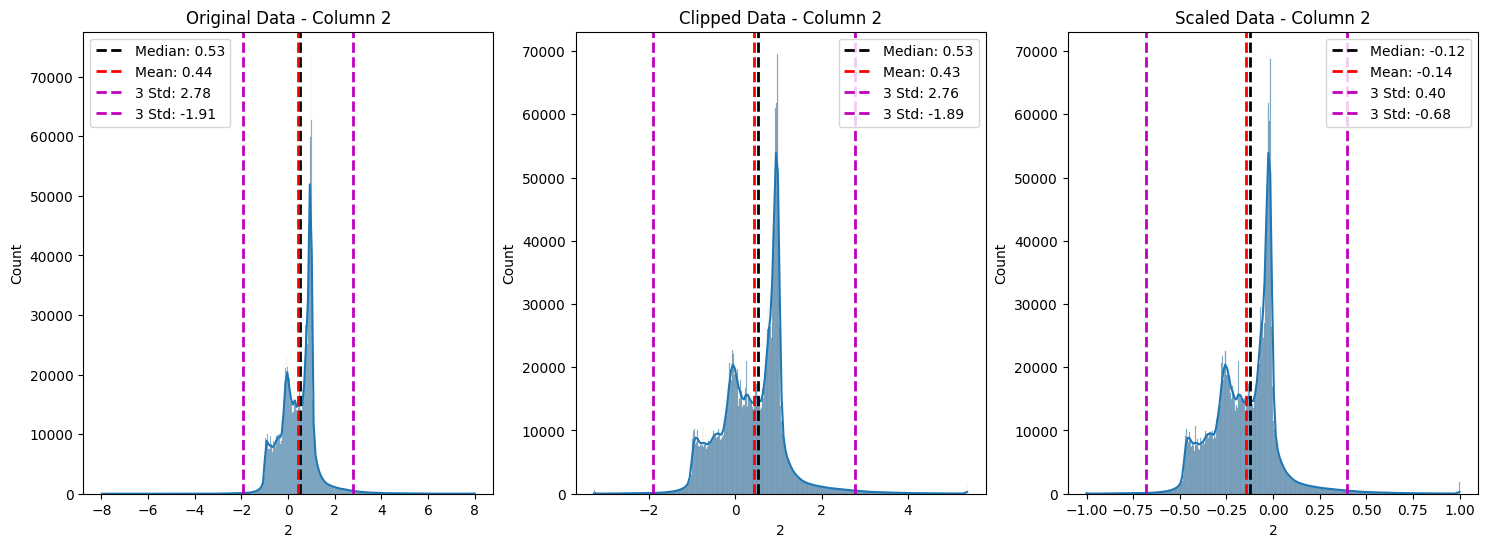

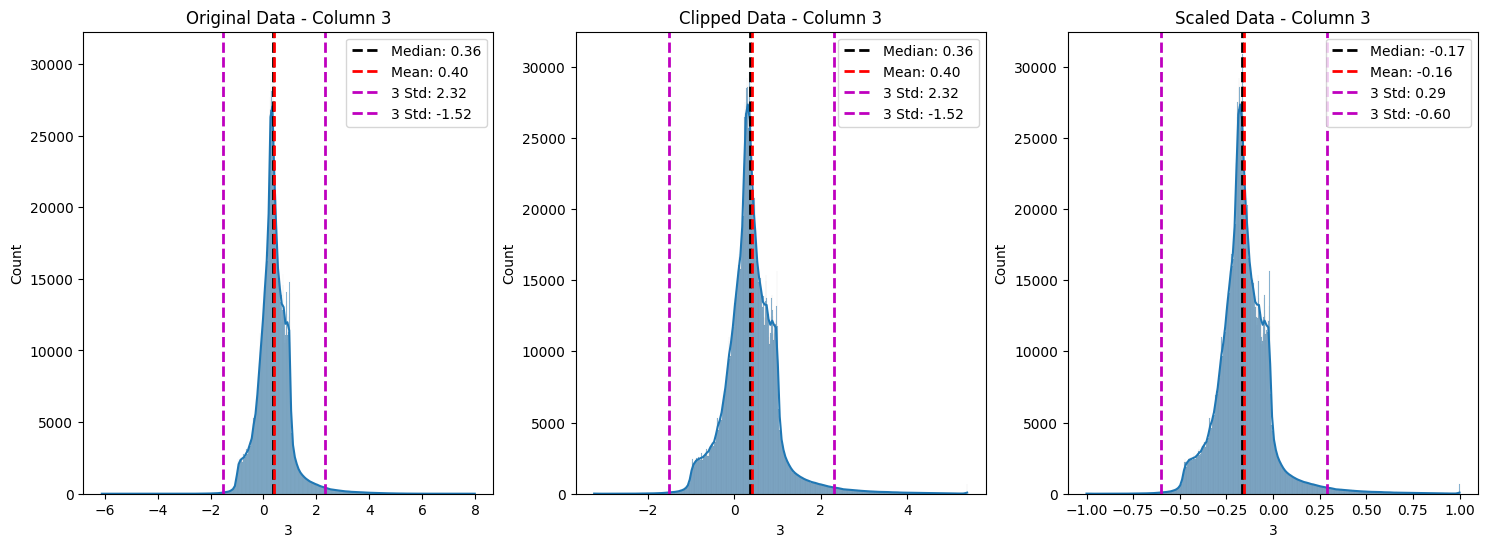

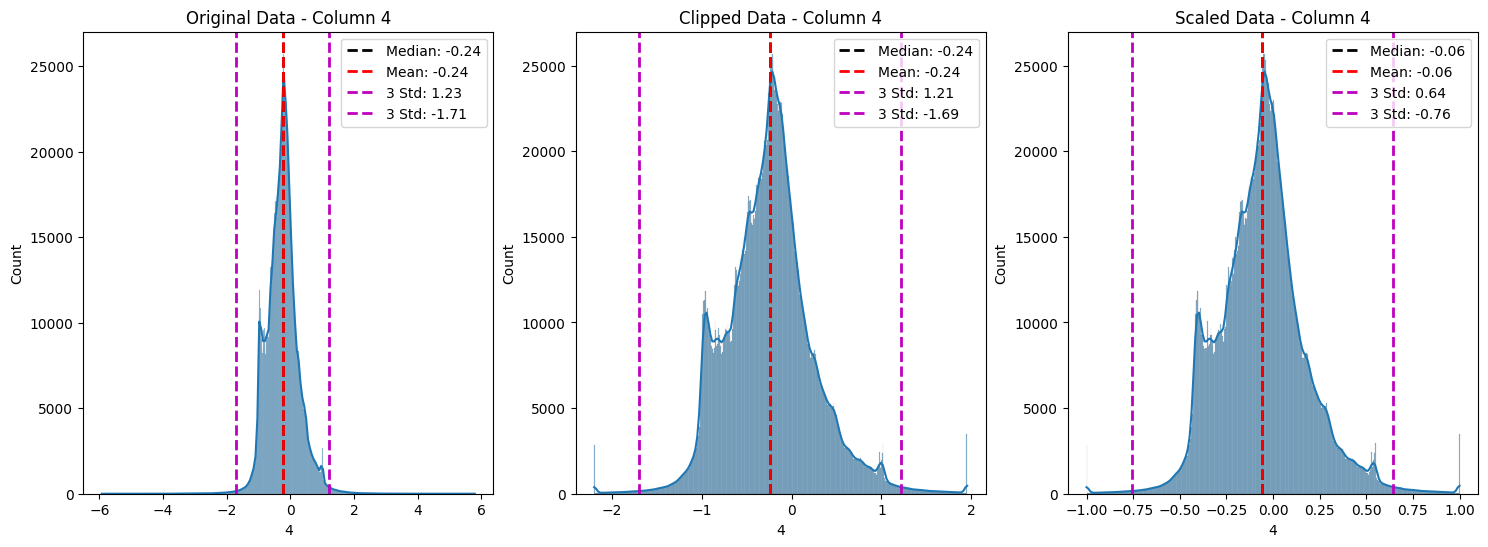

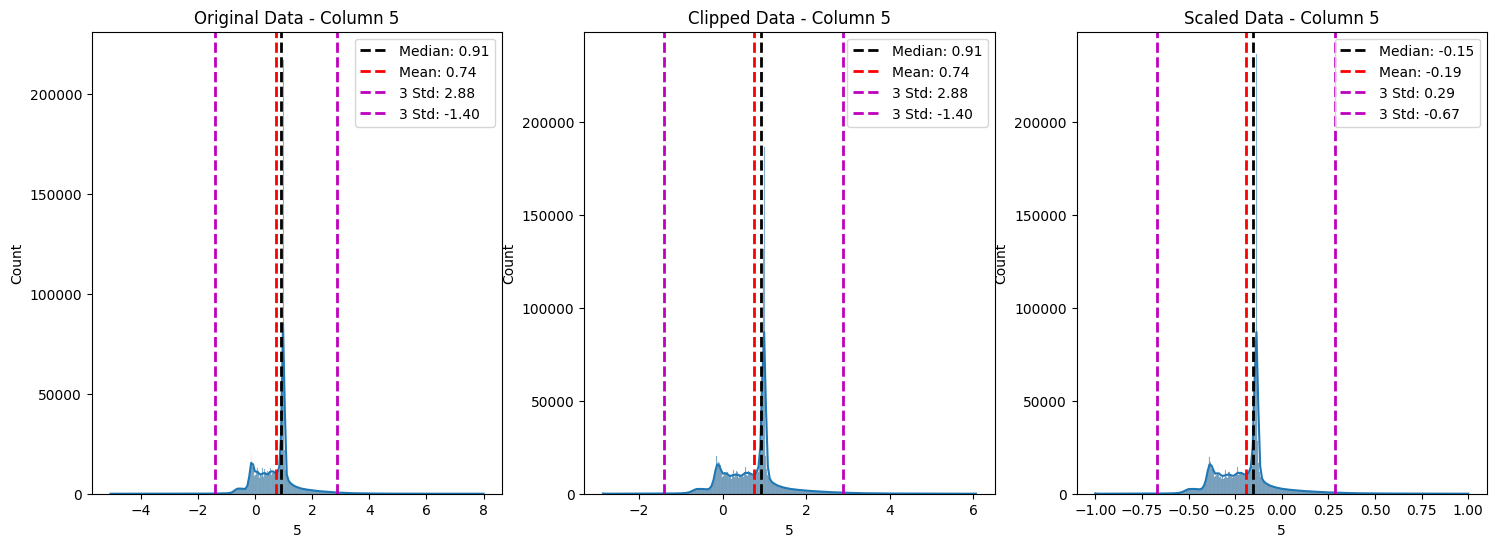

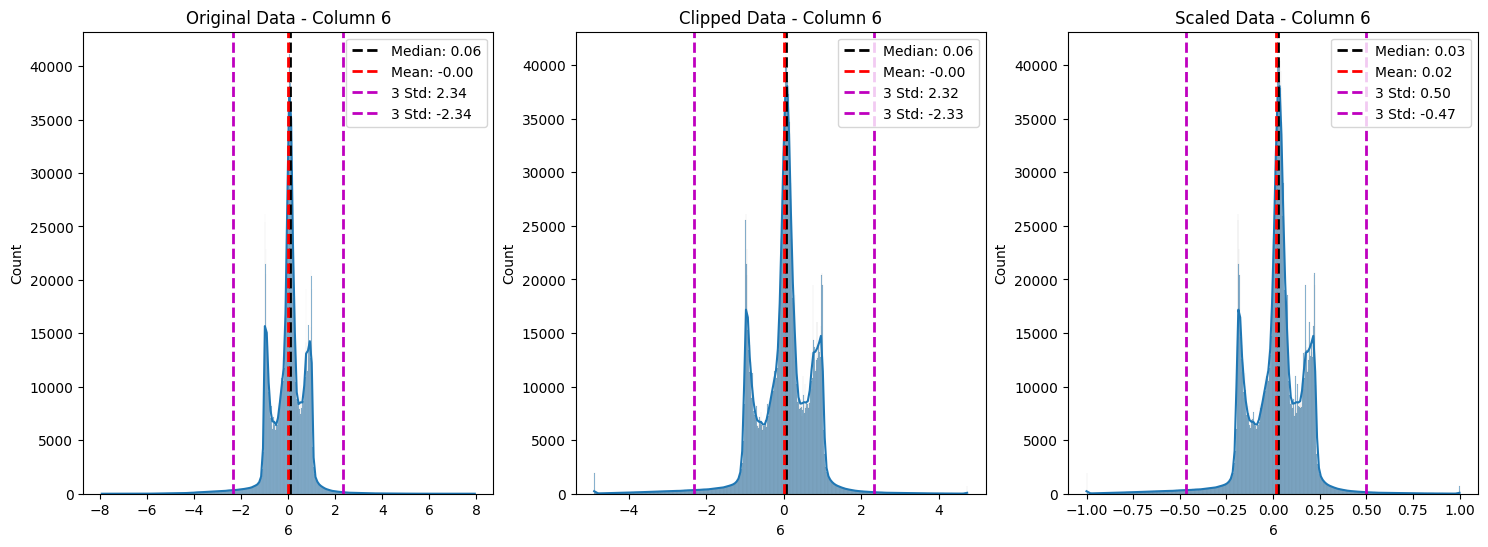

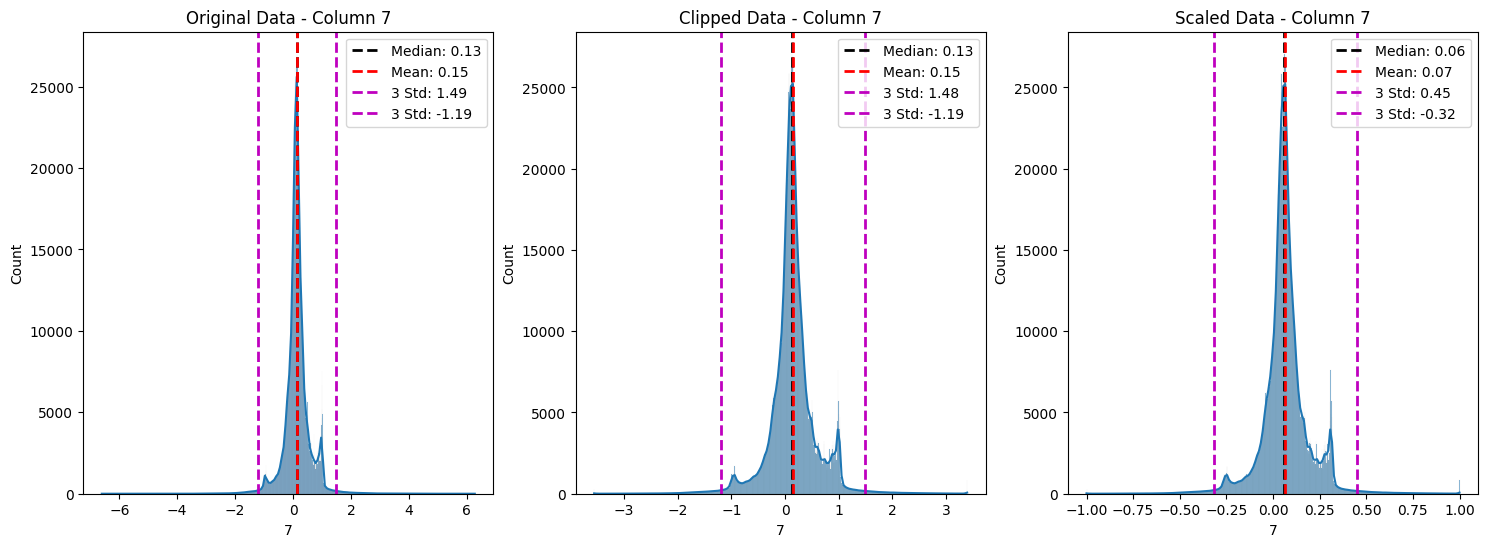

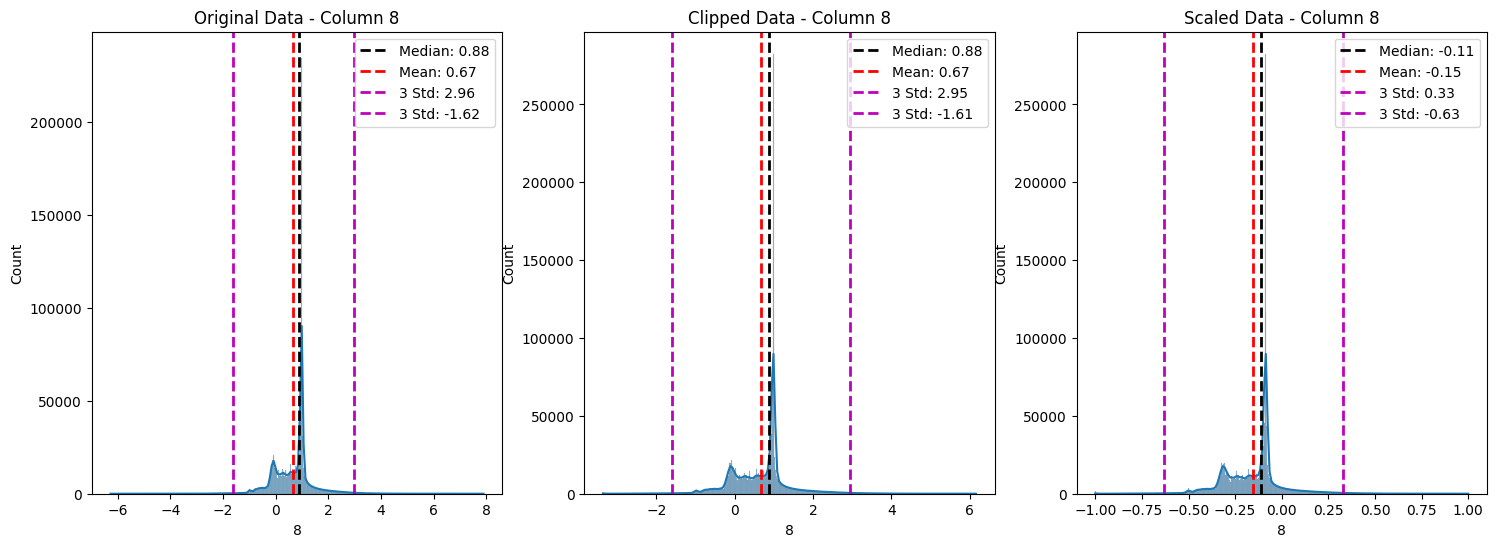

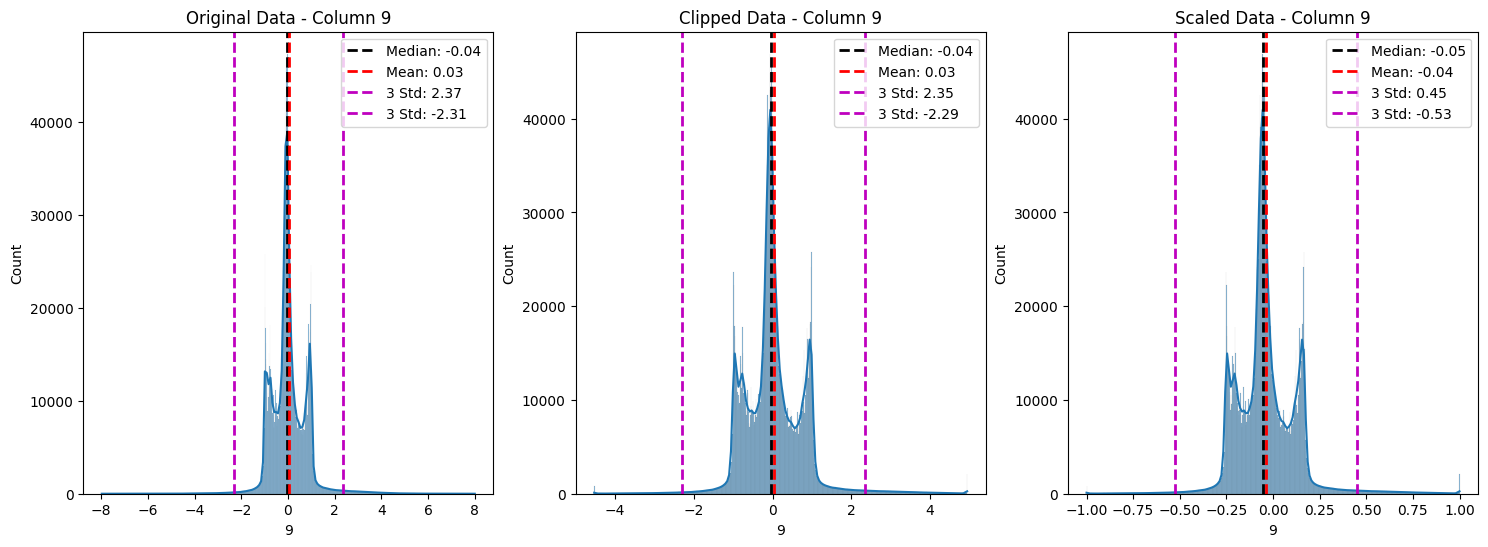

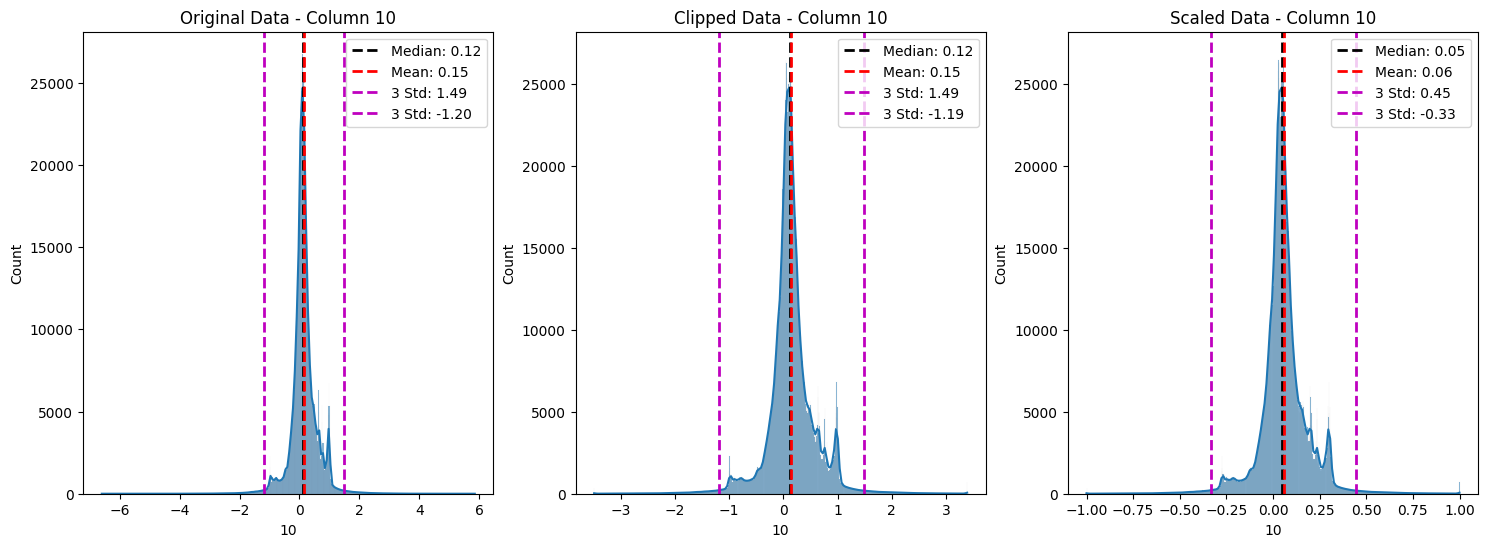

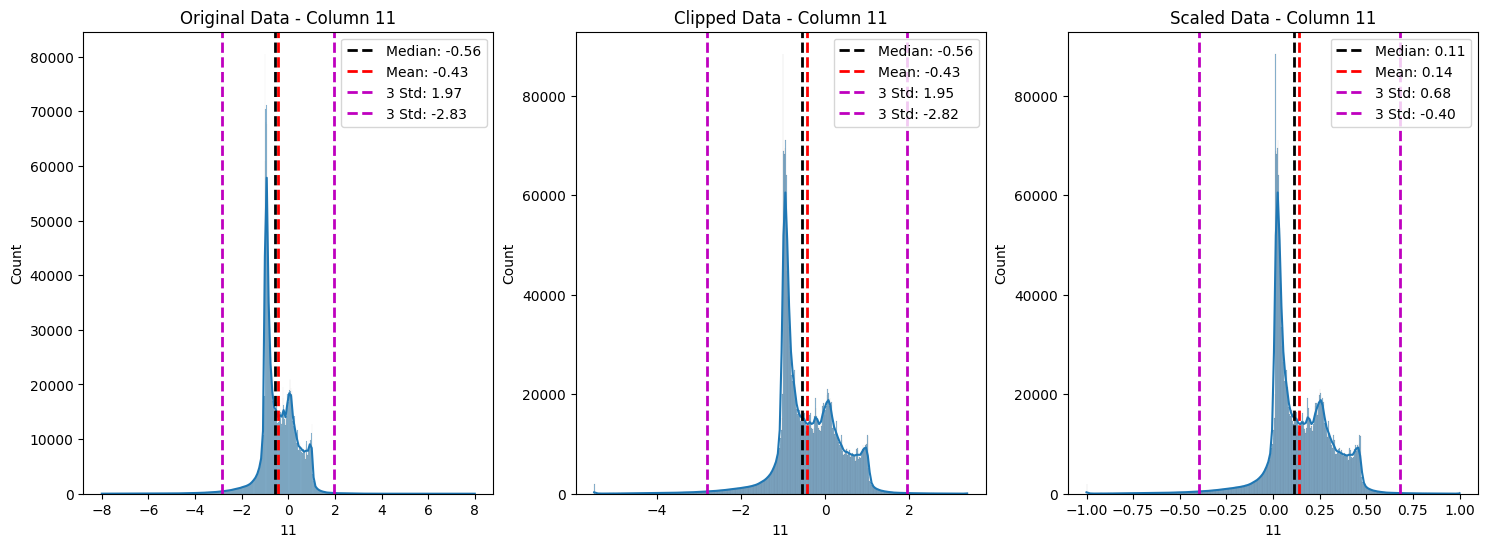

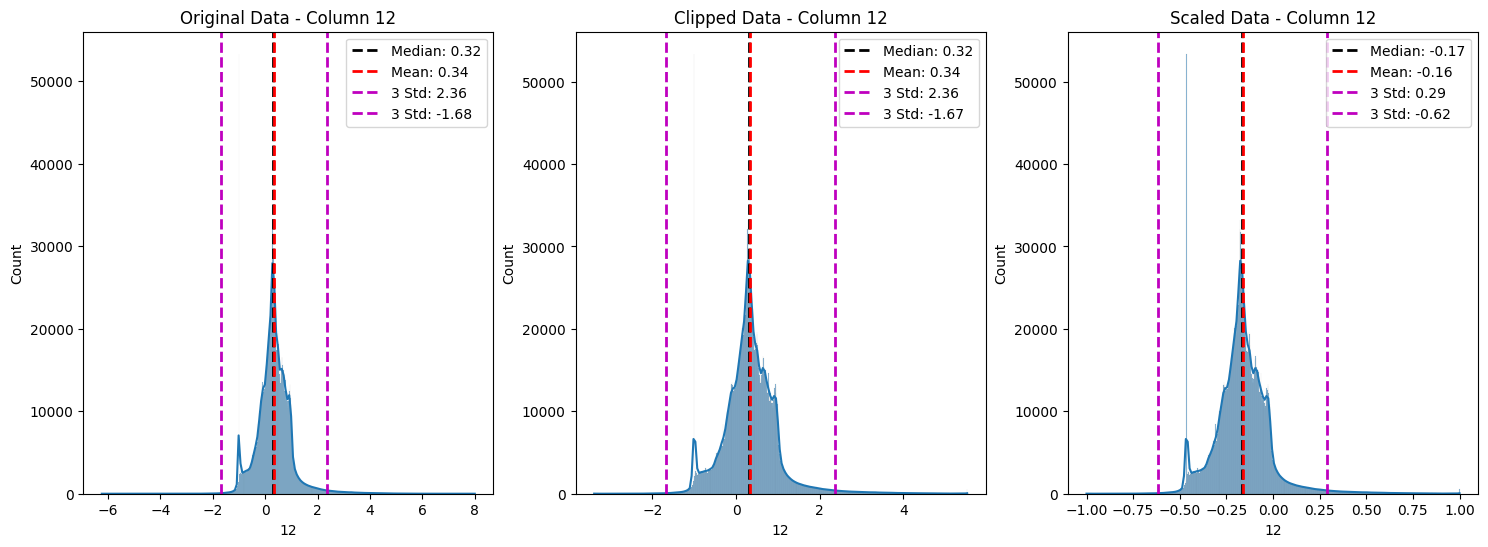

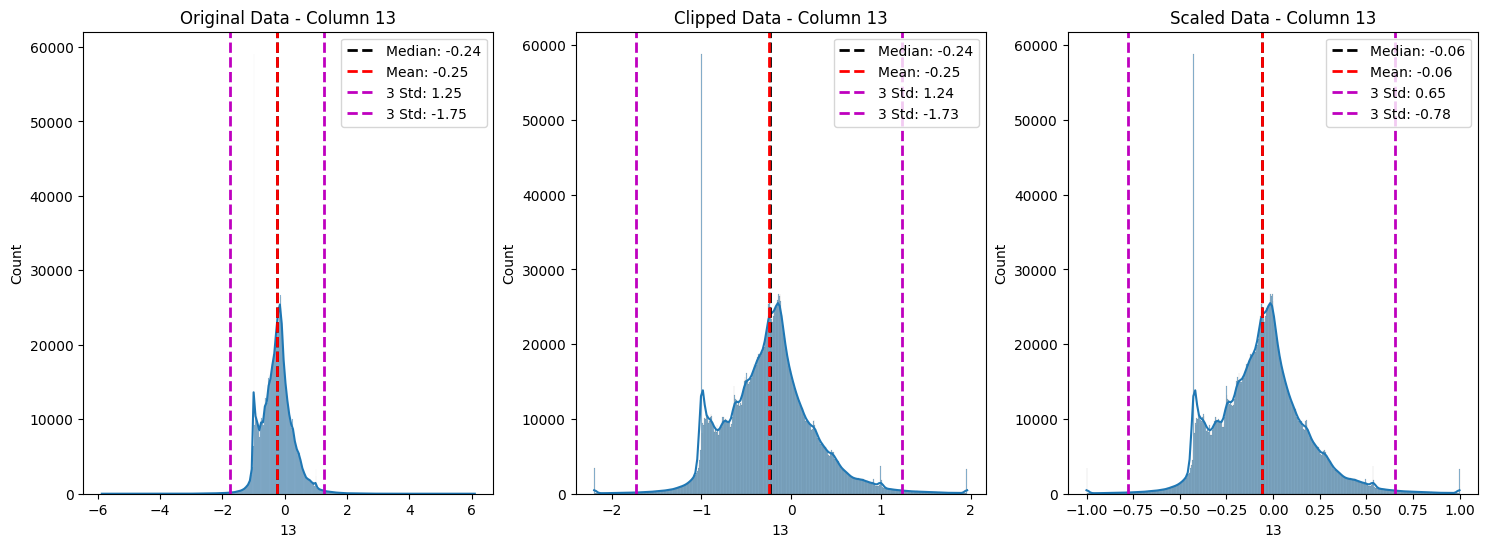

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Iterate through each column
for column in all_sub_data_p.columns[1:13]:
    # Create subplots for original, clipped, and scaled data
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Plot original data
    sns.histplot(all_sub_data_p[column], kde=True, ax=axes[0])
    mean = all_sub_data_p[column].mean()
    std = all_sub_data_p[column].std()
    median = all_sub_data_p[column].median()
    axes[0].axvline(median, color='k', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')
    axes[0].axvline(mean, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
    axes[0].axvline(mean + 3*std, color='m', linestyle='dashed', linewidth=2, label=f'3 Std: {mean + 3*std:.2f}')
    axes[0].axvline(mean - 3*std, color='m', linestyle='dashed', linewidth=2,  label=f'3 Std: {mean - 3*std:.2f}')
    axes[0].set_title(f'Original Data - Column {column}')
    axes[0].legend()
    
    # Plot clipped data
    sns.histplot(all_sub_clipped_data[column], kde=True, ax=axes[1])
    mean_clipped = all_sub_clipped_data[column].mean()
    std_clipped = all_sub_clipped_data[column].std()
    median_clipped  = all_sub_clipped_data[column].median()
    axes[1].axvline(median_clipped, color='k', linestyle='dashed', linewidth=2, label=f'Median: {median_clipped:.2f}')
    axes[1].axvline(mean_clipped, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_clipped:.2f}')
    axes[1].axvline(mean_clipped + 3*std_clipped, color='m', linestyle='dashed', linewidth=2, label=f'3 Std: {mean_clipped  + 3*std_clipped:.2f}')
    axes[1].axvline(mean_clipped - 3*std_clipped, color='m', linestyle='dashed', linewidth=2,  label=f'3 Std: {mean_clipped  - 3*std_clipped:.2f}')
    axes[1].set_title(f'Clipped Data - Column {column}')
    axes[1].legend()
    
    # Plot scaled data
    sns.histplot(all_sub_scaled_data[column], kde=True, ax=axes[2])
    mean_scaled = all_sub_scaled_data[column].mean()
    std_scaled = all_sub_scaled_data[column].std()
    median_scaled = all_sub_scaled_data[column].median()
    axes[2].axvline(median_scaled, color='k', linestyle='dashed', linewidth=2, label=f'Median: {median_scaled:.2f}')
    axes[2].axvline(mean_scaled, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_scaled:.2f}')
    axes[2].axvline(mean_scaled + 3*std_scaled, color='m', linestyle='dashed', linewidth=2, label=f'3 Std: {mean_scaled + 3*std_scaled:.2f}')
    axes[2].axvline(mean_scaled - 3*std_scaled, color='m', linestyle='dashed', linewidth=2,  label=f'3 Std: {mean_scaled - 3*std_scaled:.2f}')
    axes[2].set_title(f'Scaled Data - Column {column}')
    axes[2].legend()
    
    plt.show()


In [12]:
import os
file_save_path = f"./raw_clipped_scaled/inertial/"
os.makedirs(file_save_path, exist_ok=True)

for i in range(18):
    path = f"./inertial/sbj_{i}.csv"

    raw_inertial_sbj = pd.read_csv(path, index_col=None)        
    inertial_sbj = raw_inertial_sbj.replace({"label": label_dict}).fillna(-1).to_numpy()
    inertial_sbj[:, -1] += 1

    df = pd.DataFrame(inertial_sbj)

    # Create index columns for the columns starting from 0
    df.columns = [i+1 for i in range(len(df.columns))]

    clipped_data = df.copy(deep=True)
    for column in clipped_data.columns[1:13]:
        # Clip values in the column
        clipped_data[column] = np.clip(clipped_data[column], column_lower_bound_dict.get(str(column)),column_upper_bound_dict.get(str(column)))

    scaled_data = clipped_data.copy(deep=True)
    # Loop through each column in the DataFrame
    for column in scaled_data.columns[1:13]:
        # Perform min-max scaling between -1 and 1
        scaled_data[column] = -1 + 2 * (scaled_data[column] - all_sub_clipped_data_min_values[column]) / (all_sub_clipped_data_max_values[column] - all_sub_clipped_data_min_values[column])

    scaled_data[14] = scaled_data[14].replace({v: k for k, v in label_dict_new.items()})
        
    # Rename the old_column_name to "label"
    scaled_data.columns = ['label' if col == 14 else col for col in df.columns]
    print(scaled_data.describe())
    # Specify the file path where you want to save the CSV
    file_path = f"{file_save_path}sbj_{i}.csv"

    # Save the Pandas DataFrame as a CSV file
    scaled_data.to_csv(file_path, index=False)

              1              2              3              4              5  \
count  139725.0  139725.000000  139725.000000  139725.000000  139725.000000   
mean        0.0      -0.122302      -0.158618      -0.051334      -0.173093   
std         0.0       0.190113       0.166748       0.229808       0.159760   
min         0.0      -0.821100      -0.852127      -1.000000      -1.000000   
25%         0.0      -0.241007      -0.248719      -0.172284      -0.267664   
50%         0.0      -0.115606      -0.176937      -0.021477      -0.151502   
75%         0.0      -0.018262      -0.107382       0.079702      -0.135291   
max         0.0       1.000000       1.000000       1.000000       1.000000   

                   6              7              8              9  \
count  139725.000000  139725.000000  139725.000000  139725.000000   
mean        0.024286       0.074370      -0.127321      -0.040225   
std         0.153843       0.142964       0.150707       0.161995   
min        -